<a href="https://colab.research.google.com/github/goku2130/workspace/blob/master/OBB_Retention_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Day 1 Retention  Prediction - OBB

Data set columns

 1. country: country of the user 
 1. u_network: ad seen on Facebook or Instagram
 1. Device_family: device family of the user
 1. Last_score: score difference of last game
 1. Last_trophies: current trophy number
 1. Install_day: day of the week of the install 
 1. Worst_run: to ignore 
 1. Best_run: to ignore 
 1. Max_winstreak : maximum number of games won in a row 
 1. max_level: maximum level reached 
 1. Dollar spent: total amount spent in game in dollar 
 1. Battles: total number of battles 
 1. Victories: total number of victories 
 1. Easy_battles: number of games against weaker opponent (with less trophies) 
 1. Fair_battles: number\'a0of games against similar opponent (with equivalents trophies) 
 1. hard_battles:\'a0number of games against stronger opponent (with more trophies) 
 1. Easy_wins: number of victories with large score difference 
 1. Big_losses:\'a0number of defeats with large score difference 
 1. Tough_wins:\'a0number of victories with small score difference 
 1. Tough_battles:\'a0number of games (victories and defeats) with small score difference 
 1. Total_player_frags: total number of frags 
 1. Max_player_frags: maximum number of frag in 1 game 
 1. Avg_player_frags: average\'a0number of frag in 1 game 
 1. Player_max_fragstreak: Maximum number of frags without dying in 1 game 
 1. max_change_of_lead: maximum lead changes during 1 game 
 1. Avg_change_of_lead: average lead changes during 1 game 
 1. Total__change_of_lead: total lead changes 
 1. Chests: total number of chests opened 
 1. diamond_spent: total number of diamond spent 
 1. Coins_spent: total number of coins spent 
 1. Upgrades: total number of cards upgrades (level up) 
 1. Speedups: number of chest timers skipped 
 1. Start_trans: number of transactions started 
 1. Fanbase_open: number of times the fanbase was opened 
 1. Club_join: number of clubs joined 
 1. Season_open: number of times the season menu was opened 
 1. Arena_open: number of times the arena menu was opened 
 1. Money: to ignore 
 1. Return: 1 if the player returned the day after his install, 0 if he didn't 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## 1. Data load

In [ ]:
pwd

'/content'

In [ ]:
from google.colab import files
import io
#uploaded = files.upload()
#dataset = pd.read_csv(io.BytesIO(uploaded['Retention_Prediction_OBB.csv']), sep = ";")
dataset = pd.read_csv('Retention_Prediction_OBB.csv', sep = ";")
#dataset = pd.read_csv(r".\input\Retention_Prediction_OBB.csv", sep = ";")
dataset.head()

,country,u_network,device_family,last_score,last_trophies,install_day,worst_run,best_run,max_winstreak,max_level,dollarspent,battles,victories,easy_battles,fair_battles,hard_battles,easy_wins,big_losses,tough_wins,tough_battles,total_player_frags,max_player_frags,avg_player_frags,player_max_fragstreak,max_change_of_lead,avg_change_of_lead,total_change_of_lead,chests,diamond_spent,coins_spent,upgrades,speedups,start_trans,fanbase_open,club_join,season_open,arena_open,money,Return
0,France,Instagram Installs,HONOR HUAWEI JSN-L21,141.0,15,friday,1.0,2.0,1.0,0.0,0,3,3,0,3,0,2,0,0,0,15.0,6.0,5.0,6.0,6.0,4.0,12.0,1,9,60,0,1,0,0,0,1,0,0,1
1,Qatar,Instagram Installs,Apple iPhone,23.0,45,wednesday,1.0,4.0,3.0,0.0,0,5,5,0,5,0,3,0,2,2,32.0,8.0,6.0,7.0,9.0,5.0,28.0,1,9,10,0,1,0,0,0,0,0,0,1
2,France,Facebook Installs,Apple iPhone,-459.0,174,wednesday,1.0,5.0,4.0,0.0,0,13,10,0,11,2,6,2,3,3,65.0,8.0,5.0,5.0,9.0,4.0,59.0,3,9,60,0,1,1,1,0,2,0,0,1
3,Kazakhstan,Instagram Installs,Apple iPhone,227.0,90,tuesday,-1.0,1.0,3.0,0.0,0,4,3,0,4,0,3,0,0,1,17.0,7.0,4.0,6.0,4.0,2.0,10.0,1,9,15,0,1,0,2,0,1,0,0,1
4,Poland,Facebook Installs,Apple iPhone,-220.0,120,monday,1.0,5.0,4.0,0.0,0,7,6,0,6,1,5,1,0,0,33.0,7.0,4.0,5.0,6.0,3.0,24.0,1,9,60,0,1,0,1,0,2,0,0,1


### 1.1 Data summary 


In [ ]:
print ("Rows     : " ,dataset.shape[0])
print ("Columns  : " ,dataset.shape[1])
print ("\nFeatures : \n" ,dataset.columns.tolist()[:-1])

Rows     :  32531
Columns  :  39

Features : 
 ['country', 'u_network', 'device_family', 'last_score', 'last_trophies', 'install_day', 'worst_run', 'best_run', 'max_winstreak', 'max_level', 'dollarspent', 'battles', 'victories', 'easy_battles', 'fair_battles', 'hard_battles', 'easy_wins', 'big_losses', 'tough_wins', 'tough_battles', 'total_player_frags', 'max_player_frags', 'avg_player_frags', 'player_max_fragstreak', 'max_change_of_lead', 'avg_change_of_lead', 'total_change_of_lead', 'chests', 'diamond_spent', 'coins_spent', 'upgrades', 'speedups', 'start_trans', 'fanbase_open', 'club_join', 'season_open', 'arena_open', 'money']


The csv file contains around **32k** records with 39 columns which includes churn as well. 

In [ ]:
print ("\nUnique values :  \n",dataset.nunique())


Unique values :  
 country                   194
u_network                   2
device_family             632
last_score               1633
last_trophies            1124
install_day                 7
worst_run                  11
best_run                   10
max_winstreak              24
max_level                   9
dollarspent                85
battles                    88
victories                  64
easy_battles               46
fair_battles               67
hard_battles               40
easy_wins                  53
big_losses                 27
tough_wins                 10
tough_battles              21
total_player_frags        436
max_player_frags           16
avg_player_frags           15
player_max_fragstreak      13
max_change_of_lead         23
avg_change_of_lead         18
total_change_of_lead      345
chests                     37
diamond_spent             407
coins_spent               827
upgrades                   11
speedups                   20
start_trans         

*Observations:*
1. There are 194 unique entries for countries (no country tier column!). We need to revisit this column.
2. There are no user ids associated with the gamers while device family are too many. 
3. Install days are proper as there are only 7 days.

In [ ]:
dataset.dtypes

country                   object
u_network                 object
device_family             object
last_score               float64
last_trophies              int64
install_day               object
worst_run                float64
best_run                 float64
max_winstreak            float64
max_level                float64
dollarspent                int64
battles                    int64
victories                  int64
easy_battles               int64
fair_battles               int64
hard_battles               int64
easy_wins                  int64
big_losses                 int64
tough_wins                 int64
tough_battles              int64
total_player_frags       float64
max_player_frags         float64
avg_player_frags         float64
player_max_fragstreak    float64
max_change_of_lead       float64
avg_change_of_lead       float64
total_change_of_lead     float64
chests                     int64
diamond_spent              int64
coins_spent                int64
upgrades  

*Observations:*
4. Except country, device type, network, install day (and money to be ignored as per feature description), rest all are numeric.So not string processing required.

In [ ]:
print ("\nTotal Missing values :  ", dataset.isnull().sum().values.sum())
print ("\nMissing values :  \n", dataset.isnull().sum().where(lambda x: x != 0).dropna())


Total Missing values :   8163

Missing values :  
 country                     1.0
last_score                 11.0
worst_run                4072.0
best_run                 4072.0
total_player_frags          1.0
max_player_frags            1.0
avg_player_frags            1.0
player_max_fragstreak       1.0
max_change_of_lead          1.0
avg_change_of_lead          1.0
total_change_of_lead        1.0
dtype: float64


*Observations:*
5. Out of the **8.1k** missing values, almost all of them belong to 'worst_run' and 'best_run' columns. Based on the feature description to ignore them, we can drop these 2 columns.            

In [ ]:
DROPPED_COLUMNS = ['worst_run', 'best_run']

if set(DROPPED_COLUMNS).issubset(dataset.columns):
    dataset = dataset.drop(columns = DROPPED_COLUMNS)
    
print ("\nTotal Missing values :  ", dataset.isnull().sum().values.sum())
print ("\nMissing values :  \n", dataset.isnull().sum().where(lambda x: x != 0).dropna())


Total Missing values :   19

Missing values :  
 country                   1.0
last_score               11.0
total_player_frags        1.0
max_player_frags          1.0
avg_player_frags          1.0
player_max_fragstreak     1.0
max_change_of_lead        1.0
avg_change_of_lead        1.0
total_change_of_lead      1.0
dtype: float64


### 1.2 Missing Values

#### Handling Missing Values - Last Score

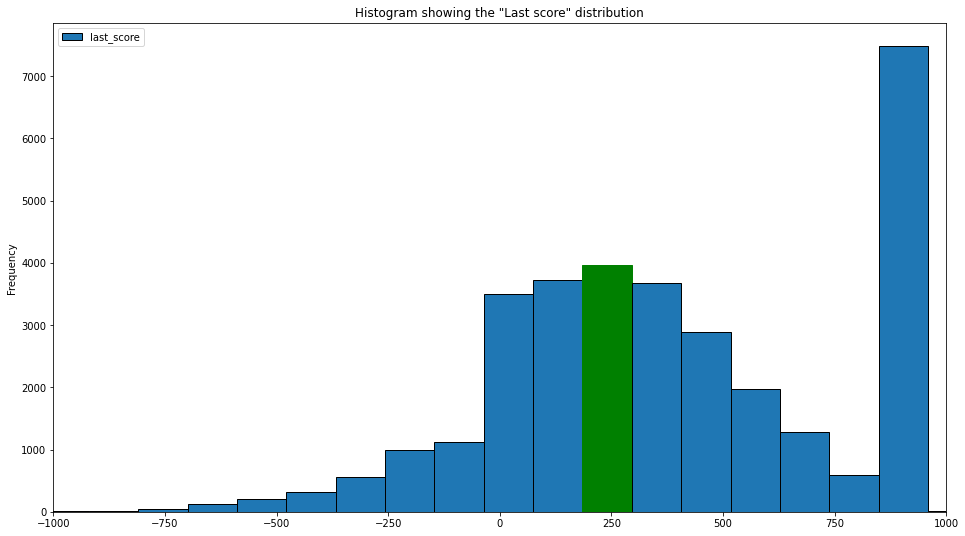

In [ ]:
plt.rcParams["figure.figsize"] = [16,9]
p = dataset[['last_score']].plot.hist(bins = 25, histtype='bar', ec='black')
bar_value_to_label = 250
min_distance = float("inf")  # initialize min_distance with infinity
index_of_bar_to_label = 0
for i, rectangle in enumerate(p.patches):  
    # iterate over every bar
    tmp = abs(  # tmp = distance from middle of the bar to bar_value_to_label
        (rectangle.get_x() +
            (rectangle.get_width() * (1 / 2))) - bar_value_to_label)
    if tmp < min_distance:  # we are searching for the bar with x cordinate
                            # closest to bar_value_to_label
        min_distance = tmp
        index_of_bar_to_label = i
p.patches[index_of_bar_to_label].set_color('g')
plt.xlim(-1000, 1000)
plt.title('Histogram showing the \"Last score\" distribution')
plt.show()

The distribution is skewed with 2 modes. We will use the first mode value of 250. 

In [ ]:
dataset['last_score'].loc[dataset['last_score'].isnull()] = 250

#### Handling Missing Values - Country

Usually for free to play games, the topmost country for most installs is United States. Let's check if it is the case here as well. We use this information to impute the value of missing country.

In [ ]:
dataset.loc[dataset['country'].isnull()]

,country,u_network,device_family,last_score,last_trophies,install_day,max_winstreak,max_level,dollarspent,battles,victories,easy_battles,fair_battles,hard_battles,easy_wins,big_losses,tough_wins,tough_battles,total_player_frags,max_player_frags,avg_player_frags,player_max_fragstreak,max_change_of_lead,avg_change_of_lead,total_change_of_lead,chests,diamond_spent,coins_spent,upgrades,speedups,start_trans,fanbase_open,club_join,season_open,arena_open,money,Return
3780,NaN,Facebook Installs,Apple iPhone,374.0,15,thursday,0.0,0.0,0,2,2,0,2,0,2,0,0,0,12.0,6.0,6.0,6.0,3.0,3.0,6.0,1,9,0,0,1,0,0,0,0,0,0,1


In [ ]:
print('\nThe most number of installs come from:', dataset['country'].mode().values[0])


The most number of installs come from: United States


In [ ]:
dataset['country'].loc[dataset['country'].isnull()] = dataset['country'].mode().values[0]
dataset.loc[dataset['country'].isnull()]

,country,u_network,device_family,last_score,last_trophies,install_day,max_winstreak,max_level,dollarspent,battles,victories,easy_battles,fair_battles,hard_battles,easy_wins,big_losses,tough_wins,tough_battles,total_player_frags,max_player_frags,avg_player_frags,player_max_fragstreak,max_change_of_lead,avg_change_of_lead,total_change_of_lead,chests,diamond_spent,coins_spent,upgrades,speedups,start_trans,fanbase_open,club_join,season_open,arena_open,money,Return


#### Handling Missing Values - total_player_frags, max_player_frags, and others

In [ ]:
dataset[['total_player_frags','max_player_frags', \
         'avg_player_frags', 'player_max_fragstreak', 'max_change_of_lead', \
         'avg_change_of_lead', 'total_change_of_lead']].loc[dataset['total_player_frags'].isnull()]

,total_player_frags,max_player_frags,avg_player_frags,player_max_fragstreak,max_change_of_lead,avg_change_of_lead,total_change_of_lead
24237,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Because the entire set of features are missing completely in the above record, it is most likely to be an outlier. We can drop the entire record from the dataset.

In [ ]:
dataset = dataset.dropna(axis = 0, how = 'any')
print('\nMissing values in the entire dataset: ',dataset.isnull().sum().sum())


Missing values in the entire dataset:  0


## 2. EDA and Feature Engineering

In [ ]:
dataset.columns

Index(['country', 'u_network', 'device_family', 'last_score', 'last_trophies',
       'install_day', 'max_winstreak', 'max_level', 'dollarspent', 'battles',
       'victories', 'easy_battles', 'fair_battles', 'hard_battles',
       'easy_wins', 'big_losses', 'tough_wins', 'tough_battles',
       'total_player_frags', 'max_player_frags', 'avg_player_frags',
       'player_max_fragstreak', 'max_change_of_lead', 'avg_change_of_lead',
       'total_change_of_lead', 'chests', 'diamond_spent', 'coins_spent',
       'upgrades', 'speedups', 'start_trans', 'fanbase_open', 'club_join',
       'season_open', 'arena_open', 'money', 'Return'],
      dtype='object')

In [ ]:
target_col = ["Return"]

cat_cols = ['country', 'u_network', 'device_family', 'install_day']

player_perf_cols = ['last_score', 'last_trophies', 'max_winstreak', 'max_level', \
                    'victories', 'easy_battles', 'fair_battles', 'hard_battles', \
                    'easy_wins', 'big_losses', 'tough_wins', 'tough_battles', \
                    'total_player_frags', 'max_player_frags', 'avg_player_frags', \
                    'player_max_fragstreak', 'max_change_of_lead', 'avg_change_of_lead', \
                    'total_change_of_lead']

player_engagements = [ 'chests', 'diamond_spent', 'coins_spent',
                   'upgrades', 'speedups', 'start_trans', 'fanbase_open', 'club_join',
                   'season_open', 'arena_open']

### 2.1 Overall Retention in the dataset

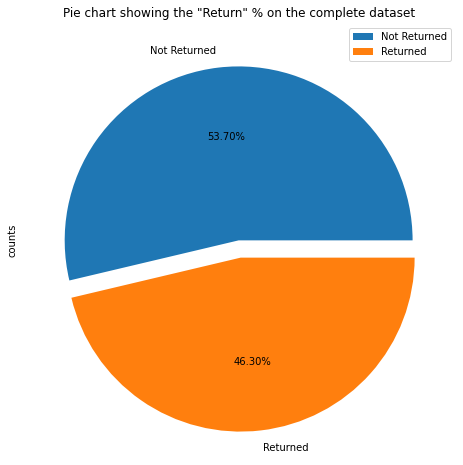

In [ ]:
di = {1: "Returned", 0: "Not Returned"}
temp = dataset[['install_day', 'Return']].groupby(target_col).size() \
                .reset_index(name='counts').replace({"Return": di}).set_index('Return') 
temp.plot.pie(y='counts', figsize=(8, 8), explode=(0, 0.1), autopct='%.2f%%')
plt.title('Pie chart showing the \"Return\" % on the complete dataset')
plt.show()

### 2.2 Top Countries based on installs

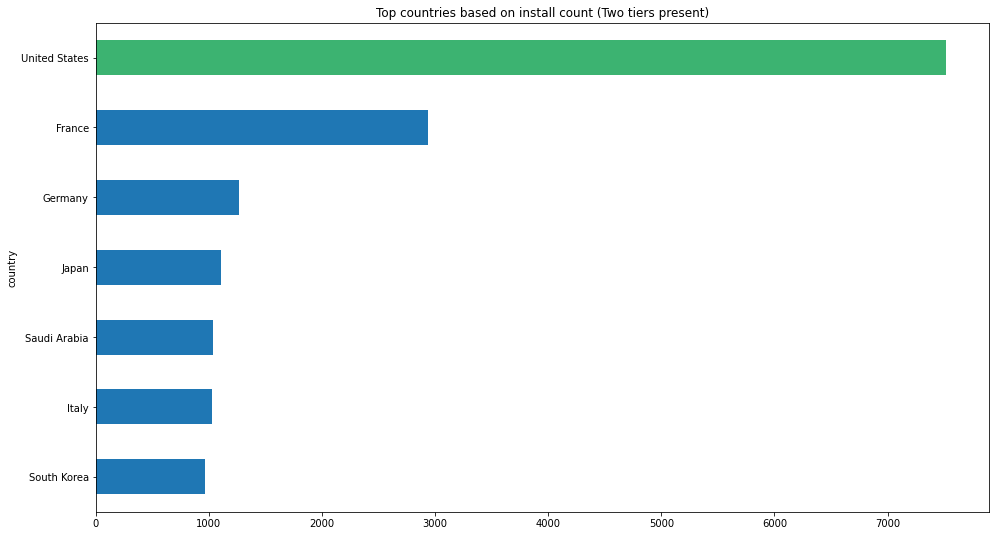

In [ ]:
dataset[['Return']] = dataset[['Return']].replace({"Return": di})
dataset['install'] = 1
temp = dataset['install'].groupby(dataset['country']).value_counts().nlargest(7)
temp = temp.to_frame()
temp = temp.rename(columns={'install': 'install_counts'})
temp = temp.reset_index().drop('install', axis = 1).set_index('country').sort_values('install_counts', ascending=True)
p = temp.plot.barh(legend = False)
plt.title('Top countries based on install count (Two tiers present)')
highlight = 'United States'
pos = temp.index.get_loc(highlight)
p.patches[pos].set_facecolor('mediumseagreen')
plt.show()

*Observations:*

We see distinct groups in the installs among **194** countries when sorted in descending order. The **US** accounts for most installs country-wise and we can assign **Tier 1** status. **Tier 2** status is associated with installs from **France, Germany, Japan, Soudi Arabia, Italy, and South Korea**. They have similar install counts (France being slight better as compared to the rest of the tier 2 countries). **Other countries** can be assigned **Tier 3** status.

Text(0.5, 1.0, 'Total Installs in the entire dataset over 3 Country Tiers')

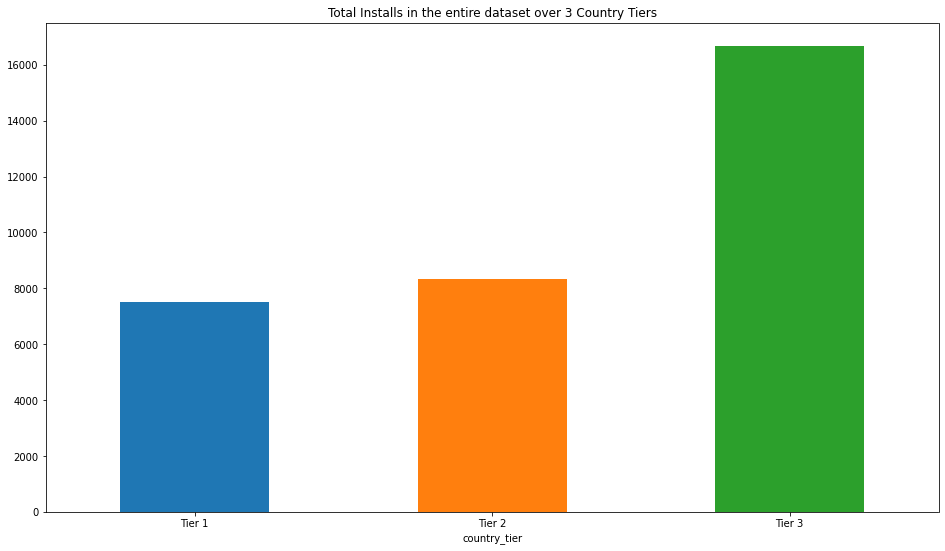

In [ ]:
def f(row):
    if row['country'] in ['United States']:
        val = 'Tier 1'
    elif row['country'] in ['Germany', 'France', 'Italy', 'Japan', 'Saudi Arabia', 'South Korea']:
        val = 'Tier 2'
    else:
        val = 'Tier 3'
    return val

dataset['country_tier'] = dataset.apply(f, axis=1)
dataset.groupby(['country_tier']).size().plot.bar(color=['C0', 'C1', 'C2'], rot=0)
plt.title('Total Installs in the entire dataset over 3 Country Tiers')

*Observations:*

Tier 1 and Tier 2 have comparable installs while tier 3 has most installs. But there are more countries present in Tier 3 that leads to heightened cumulative installs yet the installs per country is lower.

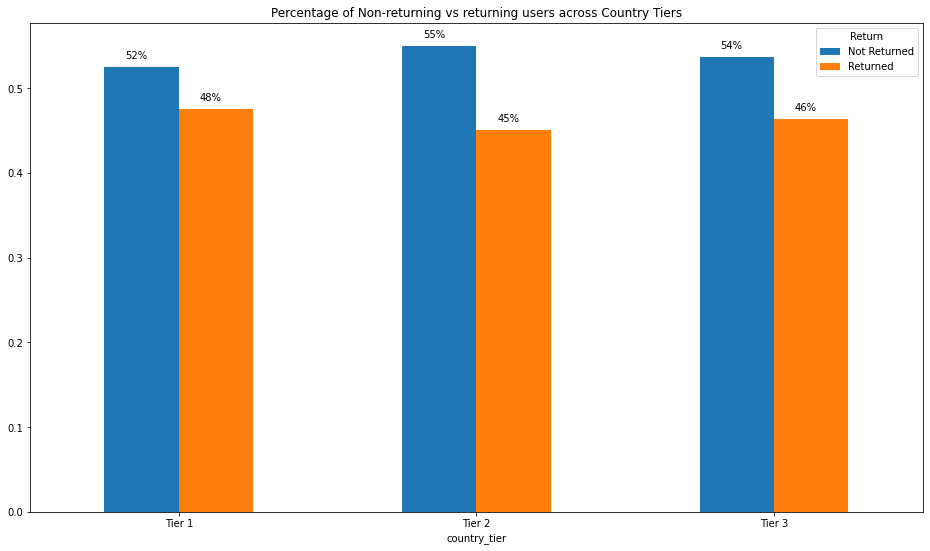

In [ ]:
temp = dataset[['country_tier', 'Return']].groupby(['country_tier', 'Return']).size().to_frame()
temp = temp.reset_index().rename(columns={0: 'User counts'})
temp = temp.pivot(index='country_tier', columns='Return', values='User counts')
ax = temp.div(temp.sum(1), axis=0).plot.bar(rot=0)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x + 0.07, y + height + 0.01))
plt.title('Percentage of Non-returning vs returning users across Country Tiers')
plt.show()

*Observations:*

Users from **Country Tier 1** have a better chance  as compared to others, of returning back the next day. Whereas, **Tier 2 and Tier 3** users does not have any significant difference between them. Yet, it seems to be a good indicator to show the quality of users.

### 2.3 Acquired channel vs Retention

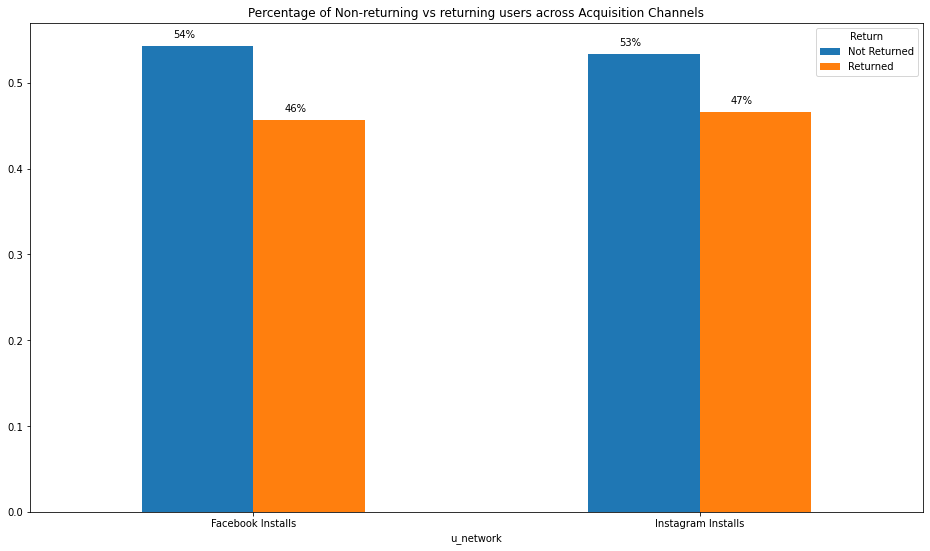

In [ ]:
temp = dataset[['u_network', 'Return']].groupby(['u_network', 'Return']).size().to_frame()
temp = temp.reset_index().rename(columns={0: 'User counts'})
temp = temp.pivot(index='u_network', columns='Return', values='User counts')
ax = temp.div(temp.sum(1), axis=0).plot.bar(rot=0)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x + 0.07, y + height + 0.01))
plt.title('Percentage of Non-returning vs returning users across Acquisition Channels')
plt.show()

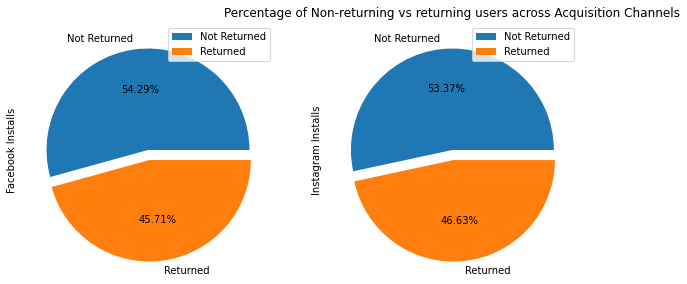

In [ ]:
temp = dataset[['u_network', 'Return']].groupby(['u_network', 'Return']).size().to_frame()
temp = temp.reset_index().rename(columns={0: 'User counts'})
temp = temp.pivot(index='Return', columns='u_network', values='User counts')
ax = temp.plot.pie(subplots=True, figsize=(10, 5),explode=(0, 0.1),autopct='%.2f%%')
plt.title('Percentage of Non-returning vs returning users across Acquisition Channels')
plt.show()

*Observations:*

Overall, instagram installs perform slightly better than facebook installs. We might need to investigate the interactions of country tier and the acquisition network to make better inference on both these networks. Usually, different campaigns are run for different countries. Maybe on a high level, there is not much of a difference in retention levels of these network for the entire dataset.

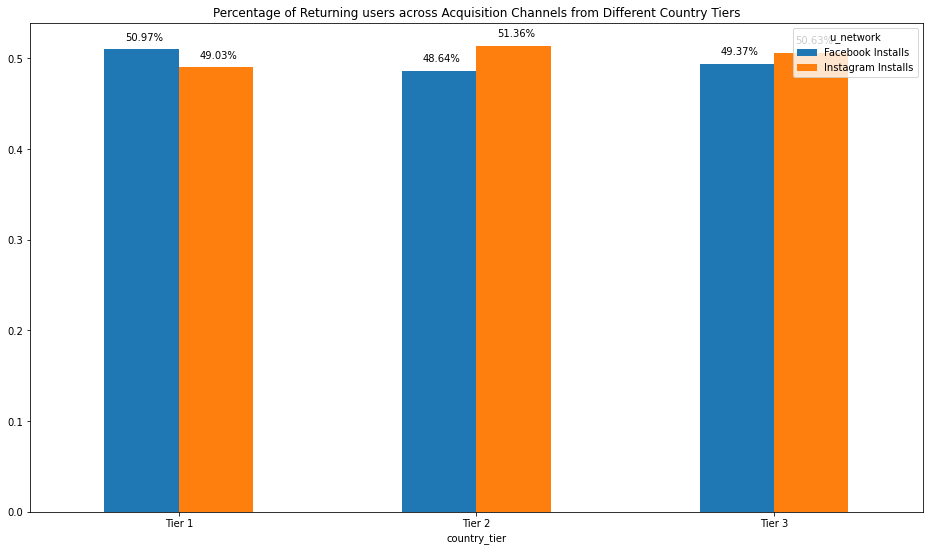

In [ ]:
temp = dataset[['country_tier', 'u_network', 'Return']].groupby(['country_tier','u_network', 'Return']).size().to_frame()
temp = temp.reset_index().rename(columns={0: 'User counts'})
#temp.loc[temp.Return == 'Returned']
temp1 = temp.groupby(['country_tier', 'u_network']).agg('sum').reset_index().rename(columns={'User counts': 'total users'})
temp = temp.merge(temp1, on = ['country_tier', 'u_network'])
temp['percent user count'] = temp['User counts']/ temp['total users']*100
temp = temp.sort_values('Return', ascending = False)
temp = temp.loc[temp['Return'] == 'Returned'].drop(['Return', 'User counts', 'total users'], axis = 1)
temp = temp.pivot(index='country_tier', columns='u_network', values='percent user count')
ax = temp.div(temp.sum(1), axis=0).plot.bar(rot=0)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.2%}'.format(height), (x + 0.07, y + height + 0.01))
plt.title('Percentage of Returning users across Acquisition Channels from Different Country Tiers')
plt.show()

*Observations:*
If we were to acquire 100 users from each of the network in all the 3 tiers:
1. **Facebook** installs return better as compared to Instagram in **USA (Tier 1)**.
2. Installs from **instagram** tend to have better retention properties as compared to facebook installs in **Tier 2 and 3** countries.
We need to also know the cost of user acquisition to make better decisions on where it is feasible to acquire the users from these channels.

### 2.4 Platform vs Installs

There are way too many device families. Also, because we have a 2 different stores namely apple store and google play, we create a new feature to identify platform. If the device family is Apple iphone then 'iOS' else 'Android'.

In [ ]:
dataset['device_family'].unique()[:10]

array(['HONOR HUAWEI JSN-L21', 'Apple iPhone',
       'samsung samsung SM-A600FN', 'lge LGE LM-V405',
       'Xiaomi Xiaomi MI 8 SE', 'Samsung Galaxy Phone',
       'HUAWEI HUAWEI LYA-L29', 'lge LGE LML212VL', 'Huawei Phone',
       'samsung samsung SM-J600FN'], dtype=object)

In [ ]:
dataset['platform'] = dataset[['device_family']].apply(lambda x: 'ios' if x['device_family'] == 'Apple iPhone' else 'android', axis=1)
dataset[['platform']].head()

,platform
0,android
1,ios
2,ios
3,ios
4,ios


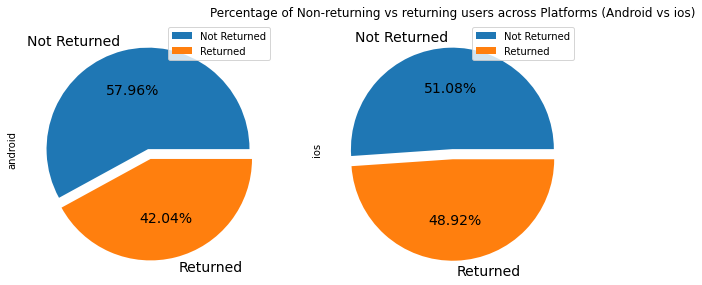

In [ ]:
temp = dataset[['platform', 'Return']].groupby(['platform', 'Return']).size().to_frame()
temp = temp.reset_index().rename(columns={0: 'User counts'})
temp = temp.pivot(index='Return', columns='platform', values='User counts')
ax = temp.plot.pie(subplots=True, figsize=(10, 5),explode=(0, 0.1),autopct='%.2f%%', textprops={'fontsize': 14})
plt.title('Percentage of Non-returning vs returning users across Platforms (Android vs ios)')
plt.show()

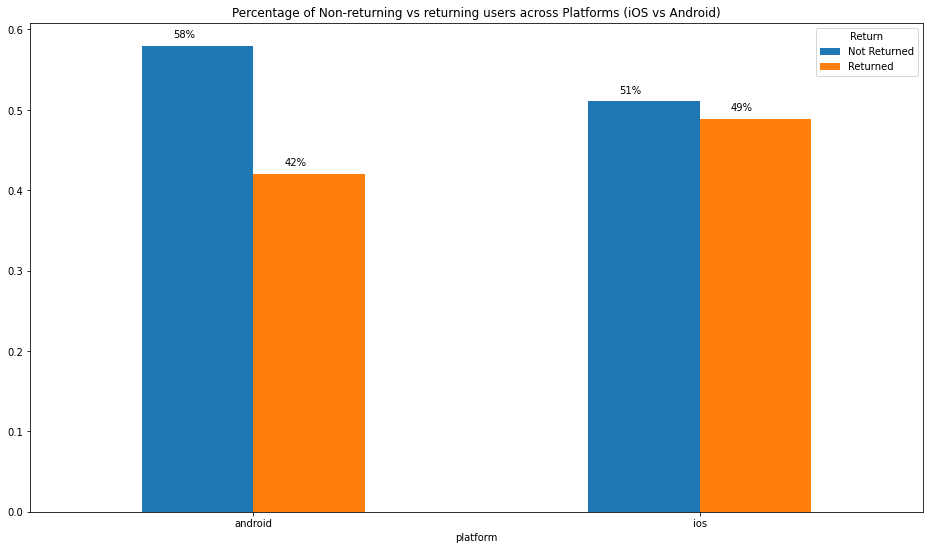

In [ ]:
temp = dataset[['platform', 'Return']].groupby(['platform', 'Return']).size().to_frame()
temp = temp.reset_index().rename(columns={0: 'User counts'})
temp = temp.pivot(index='platform', columns='Return', values='User counts')
ax = temp.div(temp.sum(1), axis=0).plot.bar(rot=0)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x + 0.07, y + height + 0.01))
plt.title('Percentage of Non-returning vs returning users across Platforms (iOS vs Android)')
plt.show()

*Observations:*

Iphone users have a better chance of returning as compared to android phone users. It is intuitive because we have better quality players on ios platform. Again, the effects of platform can be different in different countries. But generally, platform also serves as a good indicator for retention.

### 2.5 Install day vs Installs

In [ ]:
dataset['install_day'].unique()

array(['friday   ', 'wednesday', 'tuesday  ', 'monday   ', 'sunday   ',
       'thursday ', 'saturday '], dtype=object)

The acquisition of users varies on a daily basis. We need to see if weekends have more installs vs weekdays. If a user installed on Friday, Saturday and Sunday, there is a high chance that the user got more opportunity as compared to weekday install day user. Hence, we can bucket these install days as weekend and the rest as weekday.

In [ ]:
dataset['install_day_type'] = dataset[['install_day']].apply( \
        lambda x: 'weekend' if x['install_day'] in ['friday   ', 'saturday ','sunday   '] else 'weekday', axis=1)
dataset[['install_day', 'install_day_type']].head()

,install_day,install_day_type
0,friday,weekend
1,wednesday,weekday
2,wednesday,weekday
3,tuesday,weekday
4,monday,weekday


In [ ]:
dataset[['install_day_type', 'Return']].groupby(['install_day_type', 'Return']).size().to_frame().reset_index().rename(columns={0: 'User counts'})

,install_day_type,Return,User counts
0,weekday,Not Returned,11617
1,weekday,Returned,10178
2,weekend,Not Returned,5853
3,weekend,Returned,4882


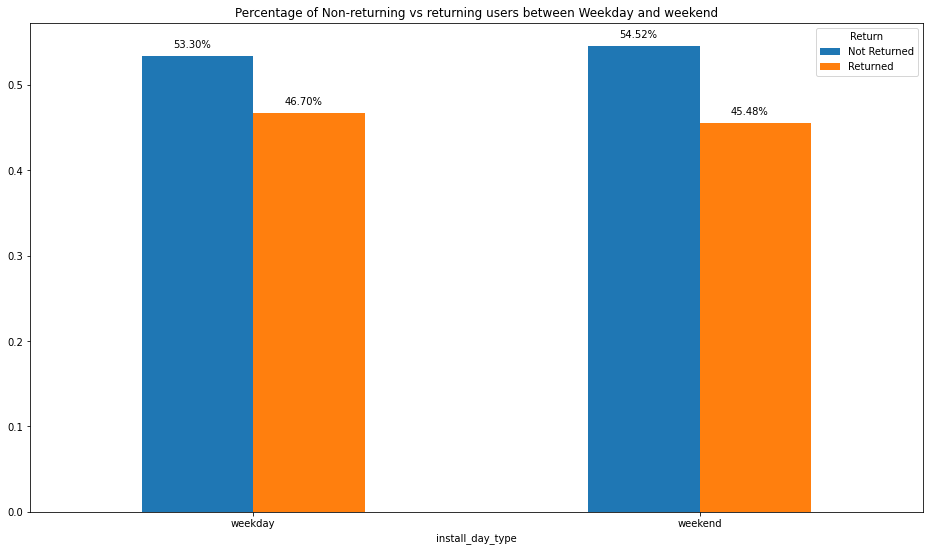

In [ ]:
temp = dataset[['install_day_type', 'Return']].groupby(['install_day_type', 'Return']).size().to_frame()
temp = temp.reset_index().rename(columns={0: 'User counts'})
temp = temp.pivot(index='install_day_type', columns='Return', values='User counts')
ax = temp.div(temp.sum(1), axis=0).plot.bar(rot=0)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.2%}'.format(height), (x + 0.07, y + height + 0.01))
plt.title('Percentage of Non-returning vs returning users between Weekday and weekend')
plt.show()

*Observations:*

Weekend install day users are less likely to return as compared to weekday install day users. 

In [ ]:
player_perf_cols = ['last_score', 'last_trophies', 'max_winstreak', 'max_level', \
                    'victories', 'easy_battles', 'fair_battles', 'hard_battles', \
                    'easy_wins', 'big_losses', 'tough_wins', 'tough_battles', \
                    'total_player_frags', 'max_player_frags', 'avg_player_frags', \
                    'player_max_fragstreak', 'max_change_of_lead', 'avg_change_of_lead', \
                    'total_change_of_lead']
dataset[player_perf_cols].head()

,last_score,last_trophies,max_winstreak,max_level,victories,easy_battles,fair_battles,hard_battles,easy_wins,big_losses,tough_wins,tough_battles,total_player_frags,max_player_frags,avg_player_frags,player_max_fragstreak,max_change_of_lead,avg_change_of_lead,total_change_of_lead
0,141.0,15,1.0,0.0,3,0,3,0,2,0,0,0,15.0,6.0,5.0,6.0,6.0,4.0,12.0
1,23.0,45,3.0,0.0,5,0,5,0,3,0,2,2,32.0,8.0,6.0,7.0,9.0,5.0,28.0
2,-459.0,174,4.0,0.0,10,0,11,2,6,2,3,3,65.0,8.0,5.0,5.0,9.0,4.0,59.0
3,227.0,90,3.0,0.0,3,0,4,0,3,0,0,1,17.0,7.0,4.0,6.0,4.0,2.0,10.0
4,-220.0,120,4.0,0.0,6,0,6,1,5,1,0,0,33.0,7.0,4.0,5.0,6.0,3.0,24.0


### 2.6 Distribution of Last scores and its impact on Retention

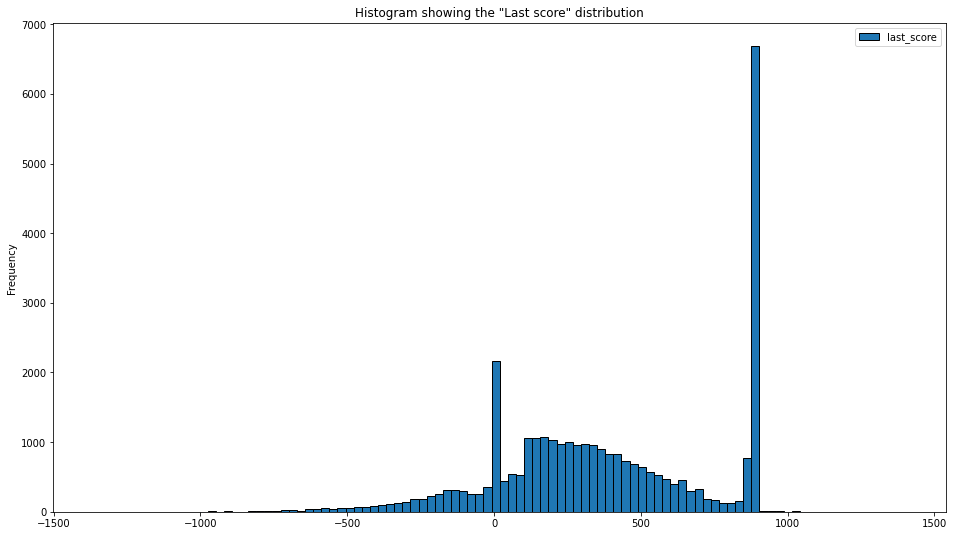

In [ ]:
dataset[['last_score']].plot.hist(bins = 100, histtype='bar', ec='black')
plt.title('Histogram showing the \"Last score\" distribution')
plt.show()

*Observations:*

It looks normally distributed except for a right-hand heavy tail at around 900 and another local peak at 0.

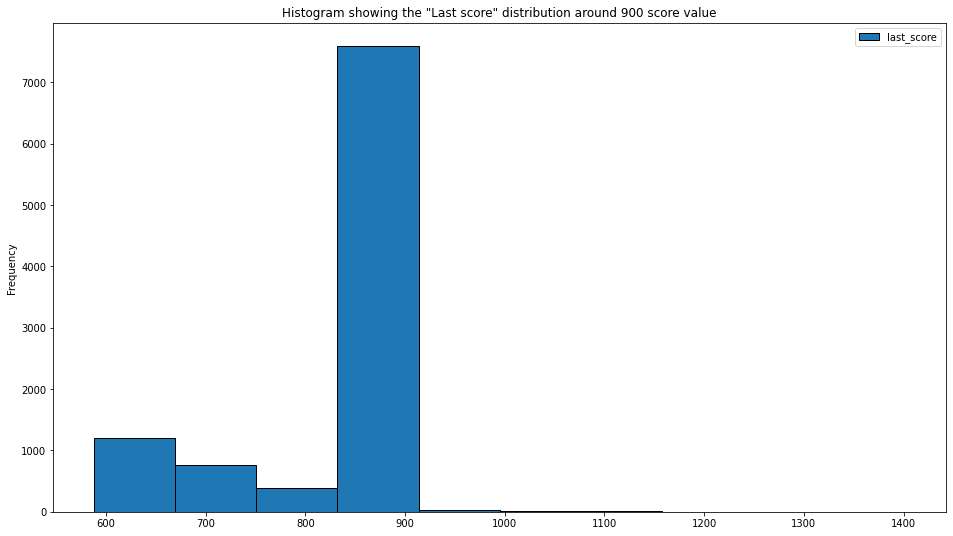

In [ ]:
dataset[['last_score']].sort_values(by = 'last_score',ascending =False).head(10000).plot.hist(bins = 10, histtype='bar', ec='black')
plt.title('Histogram showing the \"Last score\" distribution around 900 score value')
plt.show()

We will bucket the last score to nullify the skewness in the data.

Text(0.5, 1.0, 'Total Installs in the entire dataset over 3 Last Score Tiers')

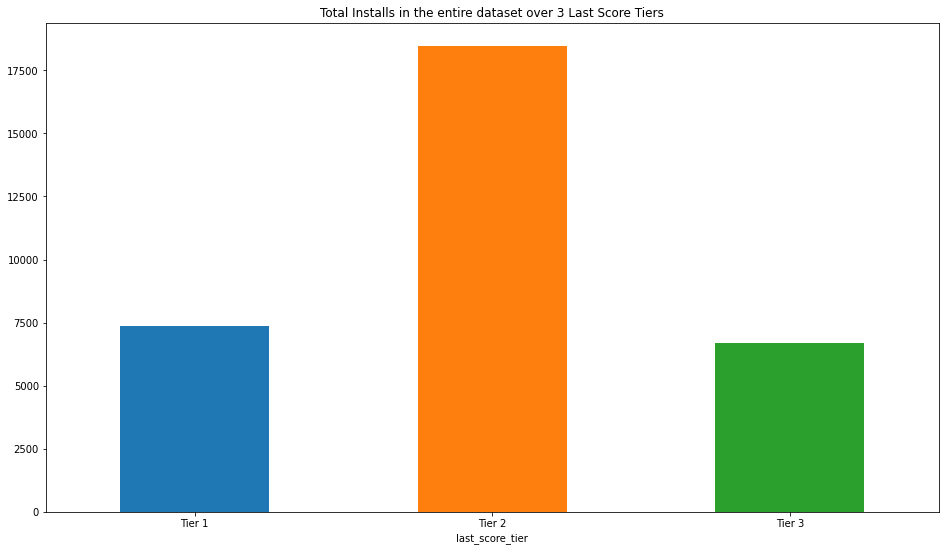

In [ ]:
def f(row):
    if row['last_score'] <=100:
        val = 'Tier 1'
    elif ((row['last_score'] >100) & (row['last_score'] <900)):
        val = 'Tier 2'
    else:
        val = 'Tier 3'
    return val

dataset['last_score_tier'] = dataset.apply(f, axis=1)
dataset.groupby(['last_score_tier']).size().plot.bar(color=['C0', 'C1', 'C2'], rot=0)
plt.title('Total Installs in the entire dataset over 3 Last Score Tiers')

In [ ]:
dataset['last_score_0'] = dataset[['last_score']].apply( \
        lambda x: 'Last_score was zero' if x['last_score'] == 0 else 'Last_score was nonzero', axis=1)
dataset[['Return', 'last_score_0']].groupby(['last_score_0', 'Return']).size().to_frame().reset_index().rename(columns={0: 'User counts'})

,last_score_0,Return,User counts
0,Last_score was nonzero,Not Returned,16037
1,Last_score was nonzero,Returned,14622
2,Last_score was zero,Not Returned,1433
3,Last_score was zero,Returned,438


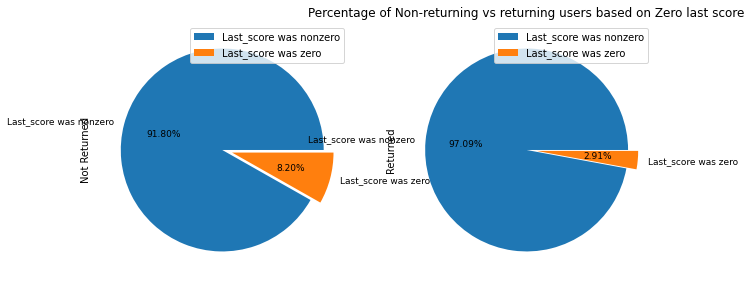

In [ ]:
temp = dataset[['Return', 'last_score_0']].groupby(['last_score_0', 'Return']).size().to_frame()
temp = temp.reset_index().rename(columns={0: 'User counts'})
temp = temp.pivot(index='last_score_0', columns='Return', values='User counts')
ax = temp.plot.pie(subplots=True, figsize=(10, 5),explode=(0, 0.1),autopct='%.2f%%', textprops={'fontsize': 9})
plt.title('Percentage of Non-returning vs returning users based on Zero last score')
plt.show()

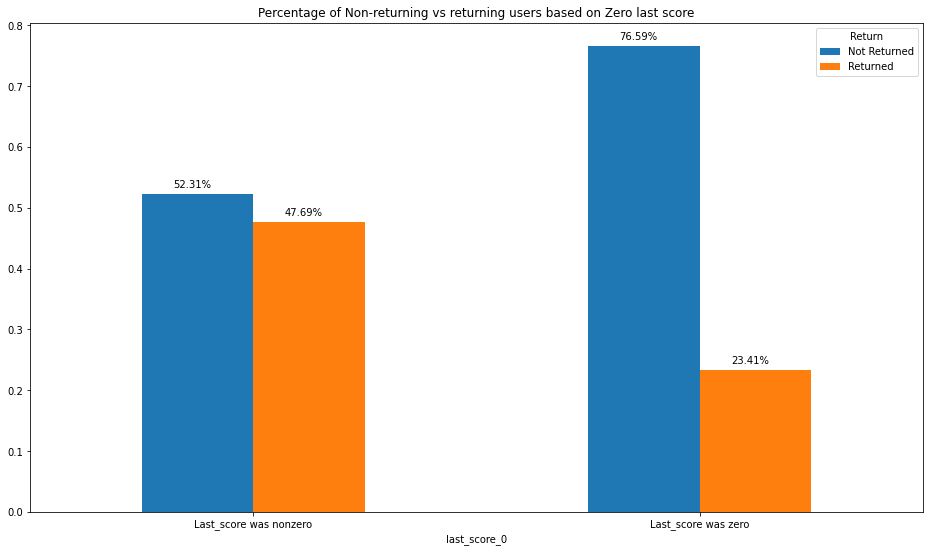

In [ ]:
temp = dataset[['Return', 'last_score_0']].groupby(['last_score_0', 'Return']).size().to_frame()
temp = temp.reset_index().rename(columns={0: 'User counts'})
temp = temp.pivot(index='last_score_0', columns='Return', values='User counts')
ax = temp.div(temp.sum(1), axis=0).plot.bar(rot=0)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.2%}'.format(height), (x + 0.07, y + height + 0.01))
plt.title('Percentage of Non-returning vs returning users based on Zero last score')
plt.show()

*Observations:*

It is most likely that if the last score was zero then the user is less inclined to return. But the converse is not true.

In [ ]:
dataset['last_score_900'] = dataset[['last_score']].apply( \
        lambda x: 'Last_score was 900' if x['last_score'] == 900 else 'Last_score was not 900', axis=1)
dataset[['Return', 'last_score_900']].groupby(['last_score_900', 'Return']).size().to_frame().reset_index().rename(columns={0: 'User counts'})

,last_score_900,Return,User counts
0,Last_score was 900,Not Returned,5402
1,Last_score was 900,Returned,1240
2,Last_score was not 900,Not Returned,12068
3,Last_score was not 900,Returned,13820


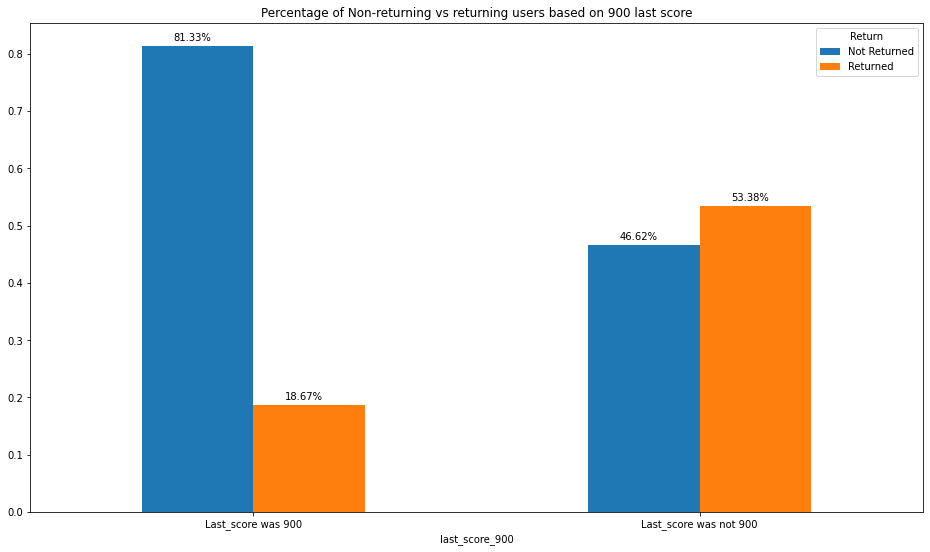

In [ ]:
temp = dataset[['Return', 'last_score_900']].groupby(['last_score_900', 'Return']).size().to_frame().reset_index().rename(columns={0: 'User counts'})
temp = temp.pivot(index='last_score_900', columns='Return', values='User counts')
ax = temp.div(temp.sum(1), axis=0).plot.bar(rot=0)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.2%}'.format(height), (x + 0.07, y + height + 0.01))
plt.title('Percentage of Non-returning vs returning users based on 900 last score')
plt.show()

*Observations:*

There is more than 81% chance of a user whose last score was 900 would not return back, even greater than users whose last score was zero. It needs further investigation.

In [ ]:
dataset[player_perf_cols].loc[(dataset['last_score_900'] == 'Last_score was 900') & (dataset['Return'] == 'Not Returned')].head()

,last_score,last_trophies,max_winstreak,max_level,victories,easy_battles,fair_battles,hard_battles,easy_wins,big_losses,tough_wins,tough_battles,total_player_frags,max_player_frags,avg_player_frags,player_max_fragstreak,max_change_of_lead,avg_change_of_lead,total_change_of_lead
13,900.0,0,0.0,0.0,2,0,2,0,2,0,0,0,7.0,4.0,3.0,4.0,3.0,3.0,6.0
17,900.0,0,0.0,0.0,1,0,1,0,1,0,0,0,4.0,4.0,4.0,4.0,3.0,3.0,3.0
28,900.0,0,0.0,0.0,2,0,2,0,2,0,0,0,8.0,5.0,4.0,5.0,3.0,3.0,6.0
36,900.0,0,0.0,0.0,1,0,1,0,1,0,0,0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
38,900.0,0,0.0,0.0,2,0,2,0,2,0,0,0,12.0,6.0,6.0,6.0,3.0,3.0,6.0


*Observations:*

It is not clear as to why the users got a last score difference as 900.

### 2.7 Battle performance and its impact on Retention


In [ ]:
battle_cols =['easy_battles', 'fair_battles', 'hard_battles', 'tough_battles', 'victories', 'easy_wins', 'tough_wins']
dataset[battle_cols].head()

,easy_battles,fair_battles,hard_battles,tough_battles,victories,easy_wins,tough_wins
0,0,3,0,0,3,2,0
1,0,5,0,2,5,3,2
2,0,11,2,3,10,6,3
3,0,4,0,1,3,3,0
4,0,6,1,0,6,5,0


lets create new columns : **total_battles**, **hard_wins** and normalize the battle counts.

In [ ]:
dataset['total_battles'] = dataset['easy_battles'] + dataset['fair_battles'] + dataset['hard_battles'] + dataset['tough_battles'] 

In [ ]:
dataset['hard_wins'] = dataset['victories'] - dataset['easy_wins'] - dataset['tough_wins'] 

In [ ]:
battle_cols =['easy_battles', 'fair_battles', 'hard_battles', 'tough_battles', 'total_battles','victories', 'easy_wins','hard_wins', 'tough_wins']
dataset[battle_cols].head()

,easy_battles,fair_battles,hard_battles,tough_battles,total_battles,victories,easy_wins,hard_wins,tough_wins
0,0,3,0,0,3,3,2,1,0
1,0,5,0,2,7,5,3,0,2
2,0,11,2,3,16,10,6,1,3
3,0,4,0,1,5,3,3,0,0
4,0,6,1,0,7,6,5,1,0


In [ ]:
dataset['easy_battles'] = dataset['easy_battles']/dataset['total_battles']
dataset['fair_battles'] = dataset['fair_battles']/dataset['total_battles']
dataset['hard_battles'] = dataset['hard_battles']/dataset['total_battles']
dataset['tough_battles'] = dataset['tough_battles']/dataset['total_battles']
dataset['easy_wins'] = (dataset['easy_wins']/dataset['victories']).fillna(0)
dataset['hard_wins'] = (dataset['hard_wins']/dataset['victories']).fillna(0)
dataset['tough_wins'] = (dataset['tough_wins']/dataset['victories']).fillna(0)

#### Customer segmentation using K means clustering

In [ ]:
dataset[['easy_battles', 'fair_battles', 'hard_battles', 'tough_battles', 'easy_wins', 'hard_wins','tough_wins']].head()

,easy_battles,fair_battles,hard_battles,tough_battles,easy_wins,hard_wins,tough_wins
0,0.0,1.000000,0.000000,0.000000,0.666667,0.333333,0.0
1,0.0,0.714286,0.000000,0.285714,0.600000,0.000000,0.4
2,0.0,0.687500,0.125000,0.187500,0.600000,0.100000,0.3
3,0.0,0.800000,0.000000,0.200000,1.000000,0.000000,0.0
4,0.0,0.857143,0.142857,0.000000,0.833333,0.166667,0.0


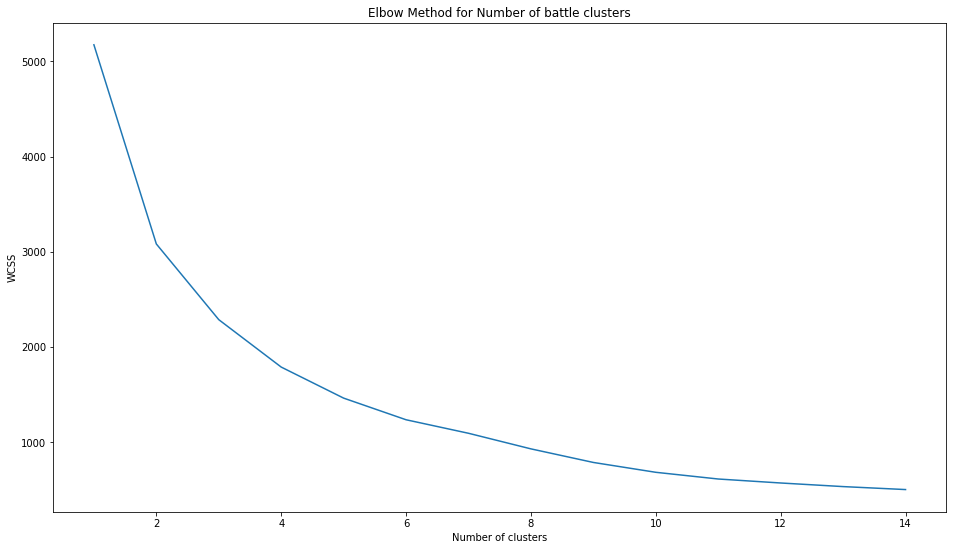

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=15, random_state=0)
    kmeans.fit(dataset[['easy_battles', 'fair_battles', 'hard_battles', 'tough_battles', 'easy_wins', 'hard_wins','tough_wins']])
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('Elbow Method for Number of battle clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=15, random_state=0)
dataset['battle_cluster'] = kmeans.fit_predict(dataset[['easy_battles', 'fair_battles', 'hard_battles', 'tough_battles', 'easy_wins', 'hard_wins','tough_wins']])

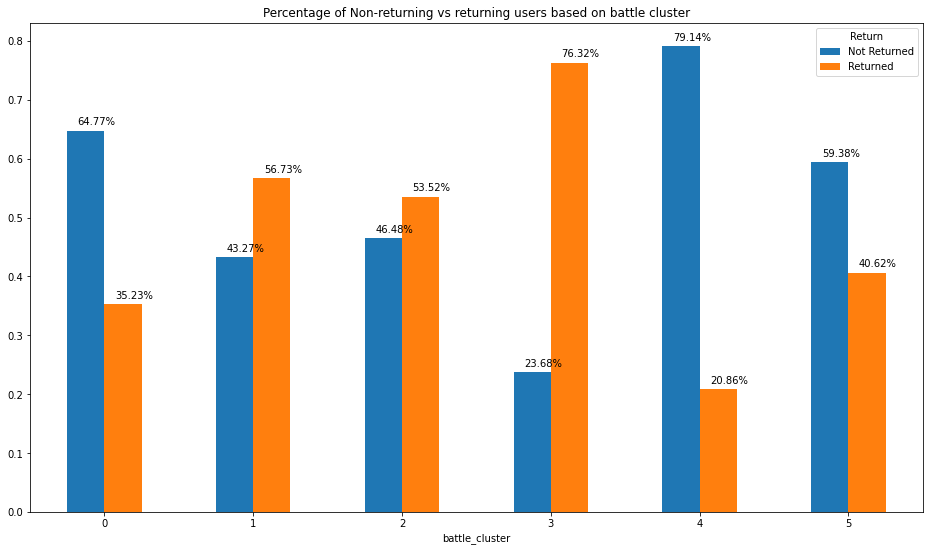

In [ ]:
temp = dataset[['battle_cluster', 'Return']].groupby(['battle_cluster', 'Return']).size().to_frame().reset_index().rename(columns={0: 'User counts'})
temp = temp.pivot(index='battle_cluster', columns='Return', values='User counts')
ax = temp.div(temp.sum(1), axis=0).plot.bar(rot=0)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.2%}'.format(height), (x + 0.07, y + height + 0.01))
plt.title('Percentage of Non-returning vs returning users based on battle cluster')
plt.show()

In [ ]:
temp

Return,Not Returned,Returned
battle_cluster,,
0,10450,5684
1,2377,3116
2,2361,2719
3,950,3062
4,1028,271
5,304,208


The battle clusters  have the following battle split ratios. For example, cluster 0 has user who play 99% fair battles 0.01% hard battles with easy wins %age as 98% and so on. 

In [ ]:
temp1 = pd.DataFrame(kmeans.cluster_centers_.round(decimals=3), columns=['easy_battles', 'fair_battles', 'hard_battles', 'tough_battles', 'easy_wins', 'hard_wins','tough_wins'])
temp1['battle_cluster'] = range(0, 6)
temp1.set_index(keys='battle_cluster')
temp1.merge(temp, on = 'battle_cluster').set_index(keys='battle_cluster')

,easy_battles,fair_battles,hard_battles,tough_battles,easy_wins,hard_wins,tough_wins,Not Returned,Returned
battle_cluster,,,,,,,,,
0,0.000,0.993,0.002,0.004,0.987,0.012,0.001,10450,5684
1,0.002,0.918,0.016,0.064,0.679,0.307,0.015,2377,3116
2,0.036,0.723,0.038,0.203,0.946,0.024,0.030,2361,2719
3,0.030,0.676,0.101,0.193,0.654,0.157,0.189,950,3062
4,0.012,0.500,0.020,0.467,0.007,0.016,0.150,1028,271
5,0.011,0.751,0.015,0.223,0.067,0.914,0.019,304,208


We can drop the unnecessary battle columns.

In [ ]:
cat_cols = ['country_tier','u_network', 'platform', 'battle_cluster','install_day_type',\
            'last_score_tier','last_score_0','last_score_900', 'max_level']

player_perf_cols = ['last_trophies', 'max_winstreak', \
                    'total_battles',  
                    'victories', 'easy_battles', 'fair_battles', 'hard_battles', 'tough_battles', \
                    'easy_wins', 'hard_wins','tough_wins', 'big_losses', \
                    'total_player_frags', 'max_player_frags', 'avg_player_frags', \
                    'player_max_fragstreak', 'max_change_of_lead', 'avg_change_of_lead', \
                    'total_change_of_lead']

player_engagements = [ 'chests', 'diamond_spent', 'coins_spent',
                   'upgrades', 'speedups', 'start_trans', 'fanbase_open', 'club_join',
                   'season_open', 'arena_open']

dataset[player_perf_cols].describe()

,last_trophies,max_winstreak,total_battles,victories,easy_battles,fair_battles,hard_battles,tough_battles,easy_wins,hard_wins,tough_wins,big_losses,total_player_frags,max_player_frags,avg_player_frags,player_max_fragstreak,max_change_of_lead,avg_change_of_lead,total_change_of_lead
count,32530.000000,32530.000000,32530.000000,32530.000000,32530.000000,32530.000000,32530.000000,32530.000000,32530.000000,32530.000000,32530.000000,32530.000000,32530.000000,32530.000000,32530.000000,32530.000000,32530.000000,32530.000000,32530.000000
mean,120.774670,2.408607,7.005503,5.073132,0.010366,0.875743,0.023257,0.090634,0.833872,0.095823,0.037259,0.371288,34.063787,6.312973,4.375284,5.047802,4.838949,3.179219,25.087611
std,305.155762,2.593837,8.904693,5.541870,0.070937,0.169821,0.069563,0.131566,0.251939,0.168169,0.106419,1.296301,50.976877,2.269051,1.723774,1.838650,2.410801,1.360424,37.706502
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,2.000000,0.000000,0.750000,0.000000,0.000000,0.740741,0.000000,0.000000,0.000000,8.000000,5.000000,3.000000,4.000000,3.000000,3.000000,6.000000
50%,15.000000,1.000000,4.000000,3.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,17.000000,6.000000,5.000000,5.000000,4.000000,3.000000,12.000000
75%,150.000000,4.000000,8.000000,6.000000,0.000000,1.000000,0.000000,0.166667,1.000000,0.166667,0.000000,0.000000,39.000000,8.000000,5.000000,6.000000,7.000000,4.000000,29.000000
max,10714.000000,33.000000,131.000000,80.000000,1.000000,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,32.000000,848.000000,16.000000,14.000000,12.000000,23.000000,17.000000,658.000000


In [ ]:
dataset[player_engagements].describe()

,chests,diamond_spent,coins_spent,upgrades,speedups,start_trans,fanbase_open,club_join,season_open,arena_open
count,32530.000000,32530.000000,32530.000000,32530.000000,32530.000000,32530.000000,32530.000000,32530.000000,32530.000000,32530.0
mean,1.727452,57.434645,484.934460,0.038365,0.947525,0.390224,1.533415,0.181894,1.058746,0.0
std,2.010559,2154.865302,8624.689197,0.274895,0.693563,1.756491,3.495939,0.417379,1.692351,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,1.000000,9.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,1.000000,9.000000,25.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.0
75%,2.000000,9.000000,60.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.0
max,79.000000,262118.000000,855798.000000,10.000000,25.000000,70.000000,182.000000,14.000000,37.000000,0.0


### 2.8 Label encoding and Normalizing

We will convert the numeric categorical fields to categories.

In [ ]:
dataset['battle_cluster'] = dataset['battle_cluster'].astype('category')
dataset['max_level'] = dataset['max_level'].astype('category')

In [ ]:
bin_cols = ['u_network', 'platform', 'install_day_type', 'last_score_0','last_score_900']

multi_cols = ['country_tier', 'battle_cluster','last_score_tier', 'max_level']

In [ ]:
dataset_cpy = dataset.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
bin_label = {}
print('Binary columns are transformed as follows:')
for i in bin_cols :
    dataset_cpy[i] = le.fit_transform(dataset_cpy[i])
    #print(le.classes_)
    bin_label_local = {}
    for ids, ele in enumerate(le.classes_):
        bin_label_local[ele] = ids
    print(i, "\t", bin_label_local)
    bin_label[i] = bin_label_local

Binary columns are transformed as follows:
u_network 	 {'Facebook Installs': 0, 'Instagram Installs': 1}
platform 	 {'android': 0, 'ios': 1}
install_day_type 	 {'weekday': 0, 'weekend': 1}
last_score_0 	 {'Last_score was nonzero': 0, 'Last_score was zero': 1}
last_score_900 	 {'Last_score was 900': 0, 'Last_score was not 900': 1}


In [ ]:
dataset_cpy = pd.get_dummies(data = dataset_cpy,columns = multi_cols )

In [ ]:
dataset_cpy.columns

Index(['country', 'u_network', 'device_family', 'last_score', 'last_trophies',
       'install_day', 'max_winstreak', 'dollarspent', 'battles', 'victories',
       'easy_battles', 'fair_battles', 'hard_battles', 'easy_wins',
       'big_losses', 'tough_wins', 'tough_battles', 'total_player_frags',
       'max_player_frags', 'avg_player_frags', 'player_max_fragstreak',
       'max_change_of_lead', 'avg_change_of_lead', 'total_change_of_lead',
       'chests', 'diamond_spent', 'coins_spent', 'upgrades', 'speedups',
       'start_trans', 'fanbase_open', 'club_join', 'season_open', 'arena_open',
       'money', 'Return', 'install', 'platform', 'install_day_type',
       'last_score_0', 'last_score_900', 'total_battles', 'hard_wins',
       'country_tier_Tier 1', 'country_tier_Tier 2', 'country_tier_Tier 3',
       'battle_cluster_0', 'battle_cluster_1', 'battle_cluster_2',
       'battle_cluster_3', 'battle_cluster_4', 'battle_cluster_5',
       'last_score_tier_Tier 1', 'last_score_tier_T

In [ ]:
bin_cols = ['u_network', 'platform', 'install_day_type', 'last_score_0','last_score_900',\
            'country_tier_Tier 1', 'country_tier_Tier 2', \
           'country_tier_Tier 3', 'battle_cluster_0', 'battle_cluster_1',\
           'battle_cluster_2', 'battle_cluster_3', 'battle_cluster_4', \
           'battle_cluster_5', 'last_score_tier_Tier 1', 'last_score_tier_Tier 2',\
           'last_score_tier_Tier 3', 'max_level_0.0', 'max_level_1.0',\
           'max_level_2.0', 'max_level_3.0', 'max_level_4.0', 'max_level_5.0',\
           'max_level_6.0', 'max_level_7.0', 'max_level_8.0']

In [ ]:
dataset_cpy[bin_cols].head()

,u_network,platform,install_day_type,last_score_0,last_score_900,country_tier_Tier 1,country_tier_Tier 2,country_tier_Tier 3,battle_cluster_0,battle_cluster_1,battle_cluster_2,battle_cluster_3,battle_cluster_4,battle_cluster_5,last_score_tier_Tier 1,last_score_tier_Tier 2,last_score_tier_Tier 3,max_level_0.0,max_level_1.0,max_level_2.0,max_level_3.0,max_level_4.0,max_level_5.0,max_level_6.0,max_level_7.0,max_level_8.0
0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
1,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
4,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
num_cols = ['last_trophies', 'max_winstreak',  'total_battles', 'victories', \
           'easy_battles', 'fair_battles', 'hard_battles', 'tough_battles', \
           'easy_wins', 'hard_wins','tough_wins', 'big_losses',\
           'total_player_frags', 'max_player_frags', 'avg_player_frags', \
           'player_max_fragstreak', 'max_change_of_lead', 'avg_change_of_lead', \
           'total_change_of_lead','chests', 'diamond_spent', 'coins_spent', \
           'upgrades', 'speedups', 'start_trans', 'fanbase_open', 'club_join', \
           'season_open', 'arena_open']

In [ ]:
dataset_cpy[num_cols].describe()

,last_trophies,max_winstreak,total_battles,victories,easy_battles,fair_battles,hard_battles,tough_battles,easy_wins,hard_wins,tough_wins,big_losses,total_player_frags,max_player_frags,avg_player_frags,player_max_fragstreak,max_change_of_lead,avg_change_of_lead,total_change_of_lead,chests,diamond_spent,coins_spent,upgrades,speedups,start_trans,fanbase_open,club_join,season_open,arena_open
count,32530.000000,32530.000000,32530.000000,32530.000000,32530.000000,32530.000000,32530.000000,32530.000000,32530.000000,32530.000000,32530.000000,32530.000000,32530.000000,32530.000000,32530.000000,32530.000000,32530.000000,32530.000000,32530.000000,32530.000000,32530.000000,32530.000000,32530.000000,32530.000000,32530.000000,32530.000000,32530.000000,32530.000000,32530.0
mean,120.774670,2.408607,7.005503,5.073132,0.010366,0.875743,0.023257,0.090634,0.833872,0.095823,0.037259,0.371288,34.063787,6.312973,4.375284,5.047802,4.838949,3.179219,25.087611,1.727452,57.434645,484.934460,0.038365,0.947525,0.390224,1.533415,0.181894,1.058746,0.0
std,305.155762,2.593837,8.904693,5.541870,0.070937,0.169821,0.069563,0.131566,0.251939,0.168169,0.106419,1.296301,50.976877,2.269051,1.723774,1.838650,2.410801,1.360424,37.706502,2.010559,2154.865302,8624.689197,0.274895,0.693563,1.756491,3.495939,0.417379,1.692351,0.0
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,2.000000,2.000000,0.000000,0.750000,0.000000,0.000000,0.740741,0.000000,0.000000,0.000000,8.000000,5.000000,3.000000,4.000000,3.000000,3.000000,6.000000,1.000000,9.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,15.000000,1.000000,4.000000,3.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,17.000000,6.000000,5.000000,5.000000,4.000000,3.000000,12.000000,1.000000,9.000000,25.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.0
75%,150.000000,4.000000,8.000000,6.000000,0.000000,1.000000,0.000000,0.166667,1.000000,0.166667,0.000000,0.000000,39.000000,8.000000,5.000000,6.000000,7.000000,4.000000,29.000000,2.000000,9.000000,60.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.0
max,10714.000000,33.000000,131.000000,80.000000,1.000000,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,32.000000,848.000000,16.000000,14.000000,12.000000,23.000000,17.000000,658.000000,79.000000,262118.000000,855798.000000,10.000000,25.000000,70.000000,182.000000,14.000000,37.000000,0.0


**Observation:**

Arena open has no data as all the entries are zero. We can drop this column.

In [ ]:
num_cols = ['last_trophies', 'max_winstreak',  'total_battles', 'victories', \
           'easy_battles', 'fair_battles', 'hard_battles', 'tough_battles', \
           'easy_wins', 'hard_wins','tough_wins', 'big_losses',\
           'total_player_frags', 'max_player_frags', 'avg_player_frags', \
           'player_max_fragstreak', 'max_change_of_lead', 'avg_change_of_lead', \
           'total_change_of_lead','chests', 'diamond_spent', 'coins_spent', \
           'upgrades', 'speedups', 'start_trans', 'fanbase_open', 'club_join', \
           'season_open']

In [ ]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
scaled = std.fit_transform(dataset_cpy[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

In [ ]:
scaled[num_cols].head()

,last_trophies,max_winstreak,total_battles,victories,easy_battles,fair_battles,hard_battles,tough_battles,easy_wins,hard_wins,tough_wins,big_losses,total_player_frags,max_player_frags,avg_player_frags,player_max_fragstreak,max_change_of_lead,avg_change_of_lead,total_change_of_lead,chests,diamond_spent,coins_spent,upgrades,speedups,start_trans,fanbase_open,club_join,season_open
0,-0.346631,-0.543068,-0.449826,-0.374091,-0.146131,0.731703,-0.334336,-0.688894,-0.663686,1.412351,-0.350117,-0.286426,-0.373975,-0.137933,0.362417,0.517887,0.481611,0.603337,-0.347097,-0.361821,-0.022477,-0.049270,-0.139563,0.075661,-0.222165,-0.438634,-0.435806,-0.034713
1,-0.248319,0.228003,-0.000618,-0.013197,-0.146131,-0.950763,-0.334336,1.482778,-0.928304,-0.569808,3.408669,-0.286426,-0.040485,0.743506,0.942549,1.061772,1.726030,1.338413,0.077240,-0.361821,-0.022477,-0.055068,-0.139563,0.075661,-0.222165,-0.438634,-0.435806,-0.625616
2,0.174423,0.613538,1.010101,0.889040,-0.146131,-1.108494,1.462615,0.736266,-0.928304,0.024839,2.468973,1.256450,0.606877,0.743506,0.362417,-0.025999,1.726030,0.603337,0.899392,0.632942,-0.022477,-0.049270,-0.139563,0.075661,0.347161,-0.152584,-0.435806,0.556190
3,-0.100851,0.228003,-0.225222,-0.374091,-0.146131,-0.446023,-0.334336,0.831276,0.659408,-0.569808,-0.350117,-0.286426,-0.334741,0.302786,-0.217714,0.517887,-0.348001,-0.866816,-0.400139,-0.361821,-0.022477,-0.054488,-0.139563,0.075661,-0.222165,0.133467,-0.435806,-0.034713
4,-0.002539,0.613538,-0.000618,0.167251,-0.146131,-0.109530,1.719322,-0.688894,-0.002139,0.421271,-0.350117,0.485012,-0.020868,0.302786,-0.217714,-0.025999,0.481611,-0.131740,-0.028845,-0.361821,-0.022477,-0.049270,-0.139563,0.075661,-0.222165,-0.152584,-0.435806,0.556190


In [ ]:
dataset_cpy2 = dataset_cpy.drop(axis=1, columns=num_cols)
final_dataset = dataset_cpy2.merge(scaled,left_index=True,right_index=True,how = "inner")

In [ ]:
final_dataset.columns

Index(['country', 'u_network', 'device_family', 'last_score', 'install_day',
       'dollarspent', 'battles', 'arena_open', 'money', 'Return', 'install',
       'platform', 'install_day_type', 'last_score_0', 'last_score_900',
       'country_tier_Tier 1', 'country_tier_Tier 2', 'country_tier_Tier 3',
       'battle_cluster_0', 'battle_cluster_1', 'battle_cluster_2',
       'battle_cluster_3', 'battle_cluster_4', 'battle_cluster_5',
       'last_score_tier_Tier 1', 'last_score_tier_Tier 2',
       'last_score_tier_Tier 3', 'max_level_0.0', 'max_level_1.0',
       'max_level_2.0', 'max_level_3.0', 'max_level_4.0', 'max_level_5.0',
       'max_level_6.0', 'max_level_7.0', 'max_level_8.0', 'last_trophies',
       'max_winstreak', 'total_battles', 'victories', 'easy_battles',
       'fair_battles', 'hard_battles', 'tough_battles', 'easy_wins',
       'hard_wins', 'tough_wins', 'big_losses', 'total_player_frags',
       'max_player_frags', 'avg_player_frags', 'player_max_fragstreak',
      

In [ ]:
predictors =  bin_cols + num_cols
final_cols = bin_cols + num_cols + ['Return']
final_dataset[final_cols].head()

,u_network,platform,install_day_type,last_score_0,last_score_900,country_tier_Tier 1,country_tier_Tier 2,country_tier_Tier 3,battle_cluster_0,battle_cluster_1,battle_cluster_2,battle_cluster_3,battle_cluster_4,battle_cluster_5,last_score_tier_Tier 1,last_score_tier_Tier 2,last_score_tier_Tier 3,max_level_0.0,max_level_1.0,max_level_2.0,max_level_3.0,max_level_4.0,max_level_5.0,max_level_6.0,max_level_7.0,max_level_8.0,last_trophies,max_winstreak,total_battles,victories,easy_battles,fair_battles,hard_battles,tough_battles,easy_wins,hard_wins,tough_wins,big_losses,total_player_frags,max_player_frags,avg_player_frags,player_max_fragstreak,max_change_of_lead,avg_change_of_lead,total_change_of_lead,chests,diamond_spent,coins_spent,upgrades,speedups,start_trans,fanbase_open,club_join,season_open,Return
0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,-0.346631,-0.543068,-0.449826,-0.374091,-0.146131,0.731703,-0.334336,-0.688894,-0.663686,1.412351,-0.350117,-0.286426,-0.373975,-0.137933,0.362417,0.517887,0.481611,0.603337,-0.347097,-0.361821,-0.022477,-0.049270,-0.139563,0.075661,-0.222165,-0.438634,-0.435806,-0.034713,Returned
1,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,-0.248319,0.228003,-0.000618,-0.013197,-0.146131,-0.950763,-0.334336,1.482778,-0.928304,-0.569808,3.408669,-0.286426,-0.040485,0.743506,0.942549,1.061772,1.726030,1.338413,0.077240,-0.361821,-0.022477,-0.055068,-0.139563,0.075661,-0.222165,-0.438634,-0.435806,-0.625616,Returned
2,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.174423,0.613538,1.010101,0.889040,-0.146131,-1.108494,1.462615,0.736266,-0.928304,0.024839,2.468973,1.256450,0.606877,0.743506,0.362417,-0.025999,1.726030,0.603337,0.899392,0.632942,-0.022477,-0.049270,-0.139563,0.075661,0.347161,-0.152584,-0.435806,0.556190,Returned
3,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,-0.100851,0.228003,-0.225222,-0.374091,-0.146131,-0.446023,-0.334336,0.831276,0.659408,-0.569808,-0.350117,-0.286426,-0.334741,0.302786,-0.217714,0.517887,-0.348001,-0.866816,-0.400139,-0.361821,-0.022477,-0.054488,-0.139563,0.075661,-0.222165,0.133467,-0.435806,-0.034713,Returned
4,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,-0.002539,0.613538,-0.000618,0.167251,-0.146131,-0.109530,1.719322,-0.688894,-0.002139,0.421271,-0.350117,0.485012,-0.020868,0.302786,-0.217714,-0.025999,0.481611,-0.131740,-0.028845,-0.361821,-0.022477,-0.049270,-0.139563,0.075661,-0.222165,-0.152584,-0.435806,0.556190,Returned


In [ ]:
final_dataset['Return'] = le.fit_transform(final_dataset['Return'])
bin_label_local = {}
for ids, ele in enumerate(le.classes_):
    bin_label_local[ele] = ids
bin_label['Return'] = bin_label_local

In [ ]:
final_dataset[final_cols].head()

,u_network,platform,install_day_type,last_score_0,last_score_900,country_tier_Tier 1,country_tier_Tier 2,country_tier_Tier 3,battle_cluster_0,battle_cluster_1,battle_cluster_2,battle_cluster_3,battle_cluster_4,battle_cluster_5,last_score_tier_Tier 1,last_score_tier_Tier 2,last_score_tier_Tier 3,max_level_0.0,max_level_1.0,max_level_2.0,max_level_3.0,max_level_4.0,max_level_5.0,max_level_6.0,max_level_7.0,max_level_8.0,last_trophies,max_winstreak,total_battles,victories,easy_battles,fair_battles,hard_battles,tough_battles,easy_wins,hard_wins,tough_wins,big_losses,total_player_frags,max_player_frags,avg_player_frags,player_max_fragstreak,max_change_of_lead,avg_change_of_lead,total_change_of_lead,chests,diamond_spent,coins_spent,upgrades,speedups,start_trans,fanbase_open,club_join,season_open,Return
0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,-0.346631,-0.543068,-0.449826,-0.374091,-0.146131,0.731703,-0.334336,-0.688894,-0.663686,1.412351,-0.350117,-0.286426,-0.373975,-0.137933,0.362417,0.517887,0.481611,0.603337,-0.347097,-0.361821,-0.022477,-0.049270,-0.139563,0.075661,-0.222165,-0.438634,-0.435806,-0.034713,1
1,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,-0.248319,0.228003,-0.000618,-0.013197,-0.146131,-0.950763,-0.334336,1.482778,-0.928304,-0.569808,3.408669,-0.286426,-0.040485,0.743506,0.942549,1.061772,1.726030,1.338413,0.077240,-0.361821,-0.022477,-0.055068,-0.139563,0.075661,-0.222165,-0.438634,-0.435806,-0.625616,1
2,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.174423,0.613538,1.010101,0.889040,-0.146131,-1.108494,1.462615,0.736266,-0.928304,0.024839,2.468973,1.256450,0.606877,0.743506,0.362417,-0.025999,1.726030,0.603337,0.899392,0.632942,-0.022477,-0.049270,-0.139563,0.075661,0.347161,-0.152584,-0.435806,0.556190,1
3,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,-0.100851,0.228003,-0.225222,-0.374091,-0.146131,-0.446023,-0.334336,0.831276,0.659408,-0.569808,-0.350117,-0.286426,-0.334741,0.302786,-0.217714,0.517887,-0.348001,-0.866816,-0.400139,-0.361821,-0.022477,-0.054488,-0.139563,0.075661,-0.222165,0.133467,-0.435806,-0.034713,1
4,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,-0.002539,0.613538,-0.000618,0.167251,-0.146131,-0.109530,1.719322,-0.688894,-0.002139,0.421271,-0.350117,0.485012,-0.020868,0.302786,-0.217714,-0.025999,0.481611,-0.131740,-0.028845,-0.361821,-0.022477,-0.049270,-0.139563,0.075661,-0.222165,-0.152584,-0.435806,0.556190,1


### 2.9 Correlation

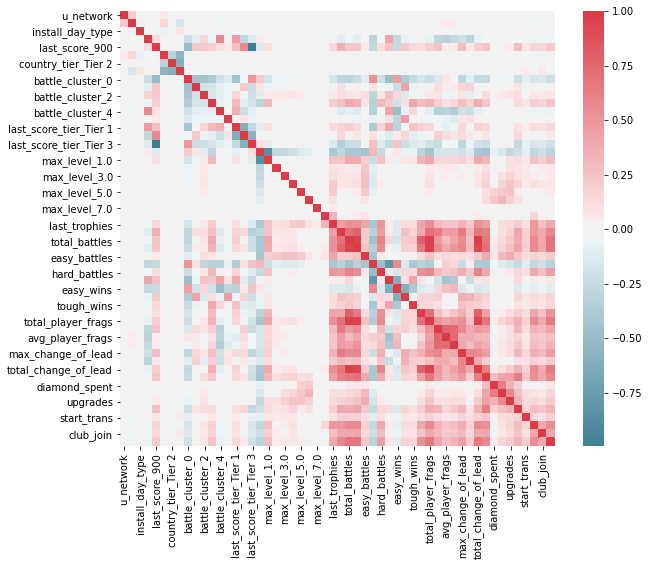

In [ ]:
import seaborn as sns
import numpy as np
corr = final_dataset[predictors].corr()
#corr.style.background_gradient(cmap='coolwarm').set_properties(**{'font-size': '0pt'})
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

**Observations:**

As expected, we find correlations in predictors related to battle categories, player in game performance and the player engagement. We will use dimentionality reduction to visualize them. 

### 2.10 PCA Dimensionality Reduction

We have a situation where a cluster of predictors are correlated. In order to identify the importance of predictors, it is necessary reduce correlated variables. We will check using PCA for the explained variance of predictors related to in game player performance.


In [ ]:
bin_label

{'Return': {'Not Returned': 0, 'Returned': 1},
 'install_day_type': {'weekday': 0, 'weekend': 1},
 'last_score_0': {'Last_score was nonzero': 0, 'Last_score was zero': 1},
 'last_score_900': {'Last_score was 900': 0, 'Last_score was not 900': 1},
 'platform': {'android': 0, 'ios': 1},
 'u_network': {'Facebook Installs': 0, 'Instagram Installs': 1}}

In [ ]:
from sklearn.decomposition import PCA

pca_cols = ['last_trophies',
       'max_winstreak', 'total_battles', 'victories', 'easy_battles',
       'fair_battles', 'hard_battles', 'tough_battles', 'easy_wins',
       'hard_wins', 'tough_wins', 'big_losses', 'total_player_frags',
       'max_player_frags', 'avg_player_frags', 'player_max_fragstreak',
       'max_change_of_lead', 'avg_change_of_lead', 'total_change_of_lead']


pca = PCA(n_components=10)
projected = pca.fit_transform(final_dataset[pca_cols])
print("cumulative variance for the 10 components:", np.cumsum(pca.explained_variance_ratio_*100))

cumulative variance for the 10 components: [40.31149072 57.82118009 66.60487653 73.04142552 78.79028612 83.23411759
 86.93627603 89.92260325 92.30876741 94.1886836 ]


## 3. Modeling

We will try the following models:
1. Logistic Regression (Baseline)
2. Logistic Regression + SMOTE to treat the class imbalance issue
3. Logistic Regression with Recursive Feature Elimination
4. Decision Tree classifier
5. Linear SVM

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score,recall_score
from yellowbrick.classifier import DiscriminationThreshold
from sklearn.metrics import plot_confusion_matrix


In [ ]:
train_test = final_dataset[final_cols]

In [ ]:
train,test = train_test_split(train_test, test_size = .25 ,random_state = 111)

In [ ]:
target_col ='Return'
train_X = train[predictors]
train_Y = train[target_col]
test_X  = test[predictors]
test_Y  = test[target_col]

### 3.1 Logistic Regression (Baseline)


In [ ]:
def retention_prediction(name, algorithm,training_x,testing_x,
                             training_y,testing_y,cols,cf,threshold_plot) :
    
    #model
    
    classifier = algorithm.fit(training_x,training_y)
    predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)

    #coeffs

    if   cf == "coefficients" :
        coefficients  = pd.DataFrame(algorithm.coef_.ravel())
    elif cf == "features" :
        coefficients  = pd.DataFrame(algorithm.feature_importances_)
        
    column_df     = pd.DataFrame(cols)
    coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
    
    print (algorithm)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy   Score : ",accuracy_score(testing_y,predictions))

    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(classifier, testing_x, testing_y,
                                    display_labels=["Not Return","Return"],
                                    cmap=plt.cm.Blues,
                                    normalize=normalize)
        disp.ax_.set_title(title)

        print(title)
        print(disp.confusion_matrix)

    #roc_auc_score
    plt.show() 
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    print ("Area under curve : ",model_roc_auc,"(",name,")\n")
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])
    color = 'orange'
    lw = 2
    plt.plot(fpr, tpr, color=color, lw=lw,
                label='{1} ROC curve (area = {0})'
                ''.format(model_roc_auc, name))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic - '+name)
    plt.legend(loc="lower right")
    plt.show() 



    return coef_sumry,fpr,tpr,thresholds,conf_matrix 
        


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.69      0.76      0.72      4371
           1       0.68      0.61      0.64      3762

    accuracy                           0.69      8133
   macro avg       0.69      0.68      0.68      8133
weighted avg       0.69      0.69      0.69      8133

Accuracy   Score :  0.6883068978236813
Confusion matrix, without normalization
[[3311 1060]
 [1475 2287]]
Normalized confusion matrix
[[0.75749256 0.24250744]
 [0.39207868 0.60792132]]


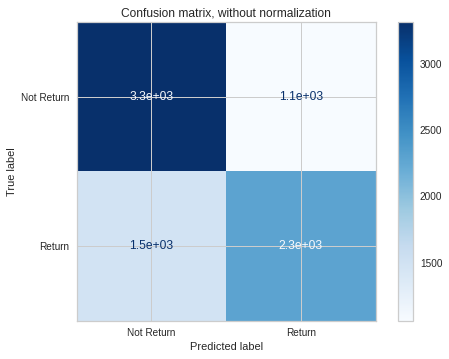

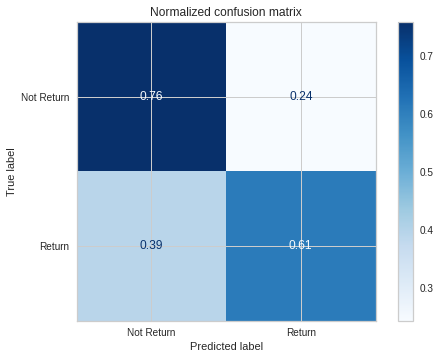

Area under curve :  0.6827069415390767 ( Logistic )



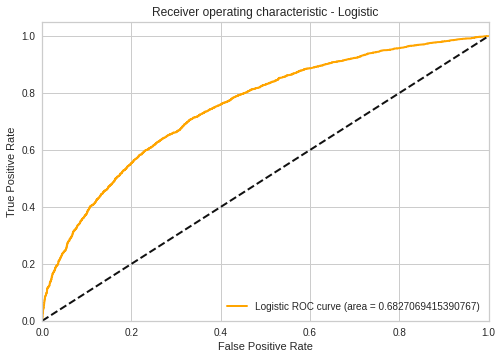

In [ ]:
logit  = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

coef_sumry,fpr,tpr,thresholds,conf_matrix = retention_prediction('Logistic',logit,train_X,test_X,train_Y,test_Y,
                         predictors,"coefficients",threshold_plot = True)

Text(0.5, 1.0, 'Top 15 Important Features of Returning Users')

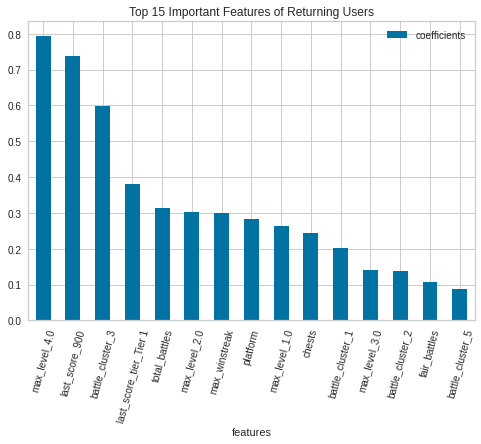

In [ ]:
coef_sumry.iloc[:15].plot.bar(x = 'features', y = 'coefficients', rot = 75)
plt.title('Top 15 Important Features of Returning Users')

Text(0.5, 1.0, 'Bottom 15 Important Features of Returning Users')

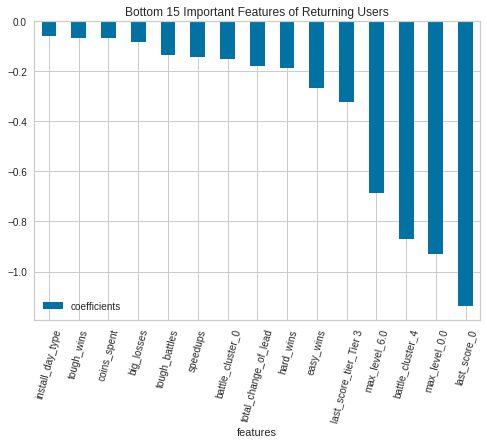

In [ ]:
coef_sumry.iloc[-15:].plot.bar(x = 'features', y = 'coefficients', rot = 75)
plt.title('Bottom 15 Important Features of Returning Users')

## 3.2 Logistic Regression + SMOTE


SMOTE refers to Synthetic Minority Oversampling Technique. It uses nearest neighbour algorithm to create new samples close to the existing minority samples. The default neighbours used are 5.

In [ ]:
from imblearn.over_sampling import SMOTE

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.71      0.70      0.70      4371
           1       0.66      0.67      0.66      3762

    accuracy                           0.68      8133
   macro avg       0.68      0.68      0.68      8133
weighted avg       0.69      0.68      0.69      8133

Accuracy   Score :  0.6848641337759744
Confusion matrix, without normalization
[[3055 1316]
 [1247 2515]]
Normalized confusion matrix
[[0.69892473 0.30107527]
 [0.33147262 0.66852738]]


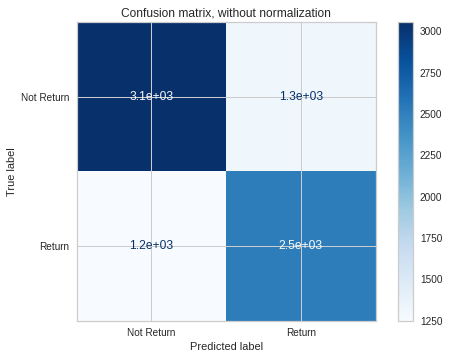

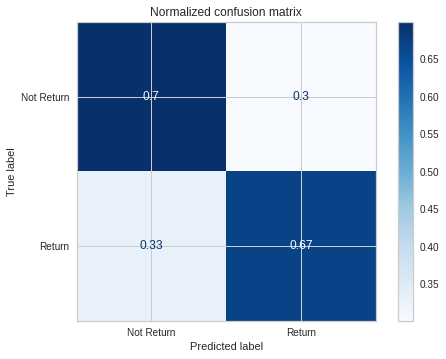

Area under curve :  0.6837260551182454 ( Logistic + SMOTE) )



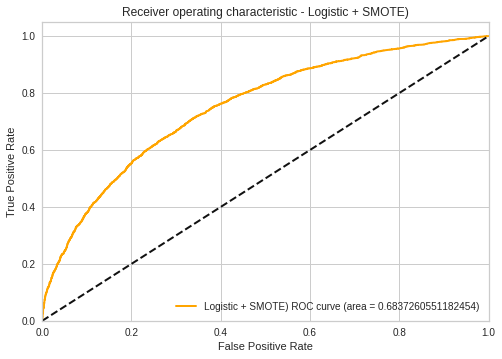

In [ ]:
os = SMOTE(random_state = 0)

#target_col ='Return'
#train_X = train[predictors]
#train_Y = train[target_col]
#test_X  = test[predictors]
#test_Y  = test[target_col]

os_smote_X,os_smote_Y = os.fit_sample(train_X,train_Y)
os_smote_X = pd.DataFrame(data = os_smote_X,columns=predictors)
os_smote_Y = pd.DataFrame(data = os_smote_Y,columns=[target_col])

logit_smote = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

coef_sumry,fpr,tpr,thresholds,conf_matrix = retention_prediction('Logistic + SMOTE)',logit_smote,os_smote_X,test_X,os_smote_Y,test_Y,
                         predictors,"coefficients",threshold_plot = True)

## 3.2 RFE + Logistic Regression + SMOTE

The goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.


In [ ]:
from sklearn.feature_selection import RFE

logit = LogisticRegression()

rfe = RFE(logit,20)
rfe = rfe.fit(os_smote_X,os_smote_Y.values.ravel())

rfe_predictors = pd.DataFrame(predictors, columns=['Important Features after RFE'])
rfe_predictors['Feature ranking'] = rfe.ranking_

In [ ]:
rfe_predictors_filtered = rfe_predictors[rfe.support_]
rfe_predictors_filtered

,Important Features after RFE,Feature ranking
1,platform,1
3,last_score_0,1
4,last_score_900,1
8,battle_cluster_0,1
11,battle_cluster_3,1
12,battle_cluster_4,1
14,last_score_tier_Tier 1,1
16,last_score_tier_Tier 3,1
17,max_level_0.0,1
18,max_level_1.0,1


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.72      0.68      0.70      4371
           1       0.65      0.68      0.67      3762

    accuracy                           0.68      8133
   macro avg       0.68      0.68      0.68      8133
weighted avg       0.69      0.68      0.68      8133

Accuracy   Score :  0.6844952661994343
Confusion matrix, without normalization
[[2994 1377]
 [1189 2573]]
Normalized confusion matrix
[[0.68496911 0.31503089]
 [0.31605529 0.68394471]]


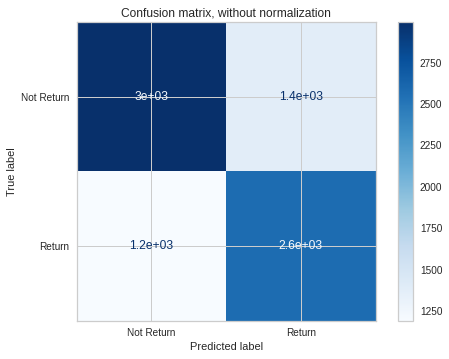

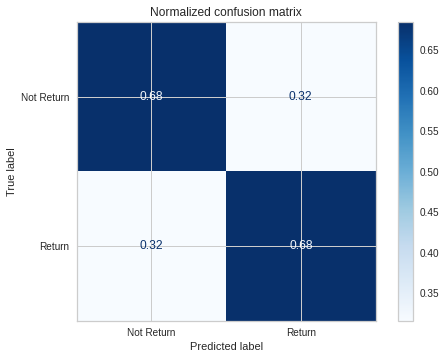

Area under curve :  0.68445691243979 ( RFE + Logistic + SMOTE) )



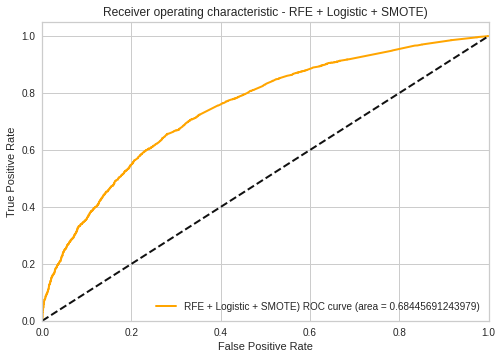

In [ ]:
cols = rfe_predictors_filtered['Important Features after RFE'].tolist()

train_rf_X = os_smote_X[cols]
train_rf_Y = os_smote_Y
test_rf_X  = test[cols]
test_rf_Y  = test[target_col]

logit_rfe = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

coef_sumry,fpr,tpr,thresholds,conf_matrix = retention_prediction('RFE + Logistic + SMOTE)', logit_rfe,train_rf_X,test_rf_X,train_rf_Y,test_rf_Y,
                         cols,"coefficients",threshold_plot = True)


## 3.4 Decision Trees Classification

Since logistic regression is not able to improve the performance, we use decision trees to model non-linearity.We can use the unnormalized dataset as the functioning of decision tree is different from logistic regression. Also, this model is easy to interpret.


In [ ]:
decision_tree_columns = ['u_network', 'last_score', 'last_trophies', 'max_winstreak', 
                    'dollarspent', 'battles', 'victories',
                    'easy_battles', 'fair_battles', 'hard_battles', 'easy_wins',
                    'big_losses', 'tough_wins', 'tough_battles', 'total_player_frags',
                    'max_player_frags', 'avg_player_frags', 'player_max_fragstreak',
                    'max_change_of_lead', 'avg_change_of_lead', 'total_change_of_lead',
                    'chests', 'diamond_spent', 'coins_spent', 'upgrades', 'speedups',
                    'start_trans', 'fanbase_open', 'club_join', 'season_open',
                    'platform', 'install_day_type',
                    'last_score_0', 'last_score_900', 'total_battles', 'hard_wins',
                    'country_tier_Tier 1', 'country_tier_Tier 2', 'country_tier_Tier 3',
                    'battle_cluster_0', 'battle_cluster_1', 'battle_cluster_2',
                    'battle_cluster_3', 'battle_cluster_4', 'battle_cluster_5',
                    'last_score_tier_Tier 1', 'last_score_tier_Tier 2',
                    'last_score_tier_Tier 3', 'max_level_0.0', 'max_level_1.0',
                    'max_level_2.0', 'max_level_3.0', 'max_level_4.0', 'max_level_5.0',
                    'max_level_6.0', 'max_level_7.0', 'max_level_8.0']

In [ ]:
dataset_cpy['Return'] = le.fit_transform(dataset_cpy['Return'])
bin_label_local = {}
for ids, ele in enumerate(le.classes_):
    bin_label_local[ele] = ids

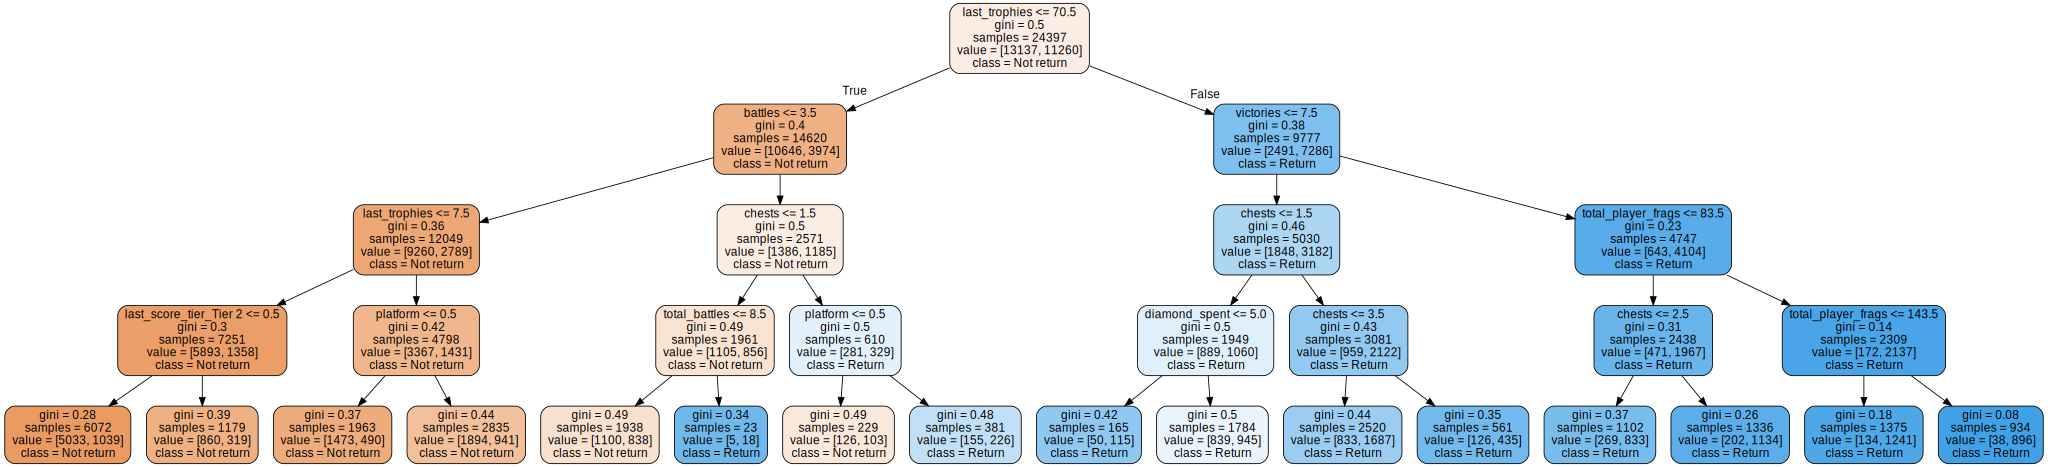

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

 Classification report : 
               precision    recall  f1-score   support

           0       0.72      0.80      0.76      4333
           1       0.74      0.65      0.69      3800

    accuracy                           0.73      8133
   macro avg       0.73      0.73      0.73      8133
weighted avg       0.73      0.73      0.73      8133

Accuracy   Score :  0.7312184925611706
Confusion matrix, without normalization
[[3464  869]
 [1317 2483]]
Normalized confusion matrix
[[0.79944611 0.20055389]
 [0.34657895 0.65342105]]


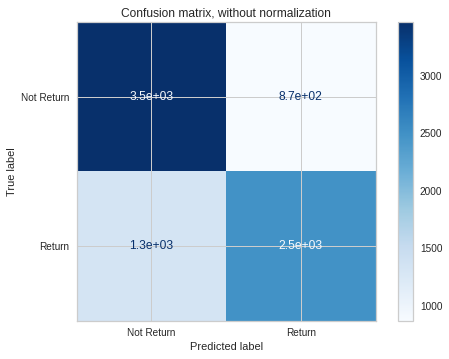

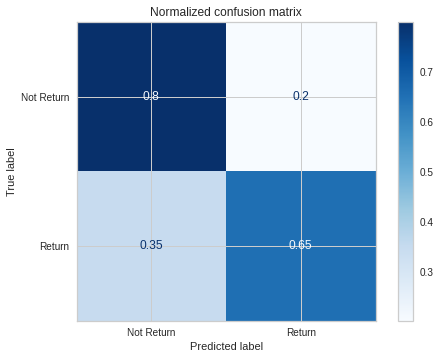

Area under curve :  0.7264335819354525 ( Decision Tree )



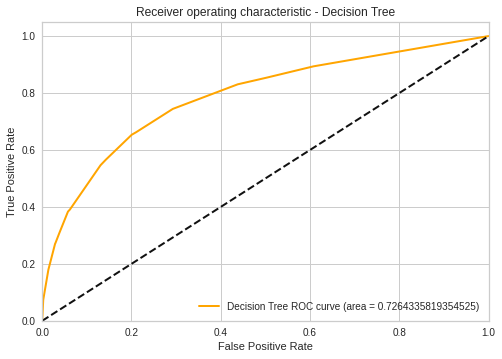

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
from graphviz import Source
from IPython.display import SVG,display

def plot_decision_tree(columns,maximum_depth,criterion_type,
                       split_type,model_performance = None) :
    
    dsc_train,dsc_test = train_test_split(dataset_cpy[columns+[target_col]], test_size = .25 ,random_state = 111)

    dtc_x = dsc_train[columns]
    dtc_y = dsc_train[target_col]

    dt_classifier = DecisionTreeClassifier(max_depth = maximum_depth,
                                           splitter  = split_type,
                                           criterion = criterion_type,
                                          )
    dt_classifier.fit(dtc_x,dtc_y)
    
    graph = Source(tree.export_graphviz(dt_classifier,out_file=None,
                                        rounded=True,proportion = False,
                                        feature_names = columns, 
                                        precision  = 2,
                                        class_names=["Not return","Return"],
                                        filled = True                         
                                       )
                  )
    display(graph)
   
    if model_performance == True :
        coef_sumry,fpr,tpr,thresholds,conf_matrix = retention_prediction('Decision Tree',
                                                                         dt_classifier,
                                                                        dtc_x,dsc_test[columns],
                                                                        dtc_y,dsc_test[target_col],
                                                                        columns,"features",threshold_plot = True)
    return coef_sumry,fpr,tpr,thresholds,conf_matrix
                                            
    
coef_sumry,fpr,tpr,thresholds,conf_matrix = plot_decision_tree(decision_tree_columns,4,"gini","best",model_performance = True)


## 3.4 Support vector Machine (Linear kernel) -Poor performance

SVC(C=1.0, break_ties=False, cache_size=1000, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1.0, kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.70      0.71      0.70      4371
           1       0.66      0.65      0.65      3762

    accuracy                           0.68      8133
   macro avg       0.68      0.68      0.68      8133
weighted avg       0.68      0.68      0.68      8133

Accuracy   Score :  0.6806836345751875
Confusion matrix, without normalization
[[3094 1277]
 [1320 2442]]
Normalized confusion matrix
[[0.70784717 0.29215283]
 [0.35087719 0.64912281]]


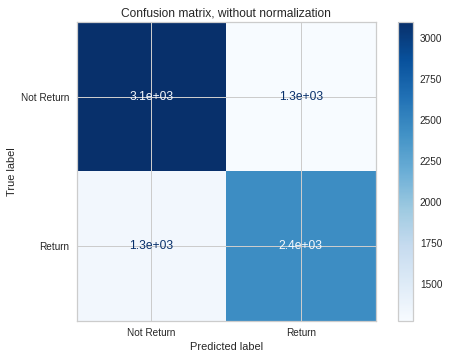

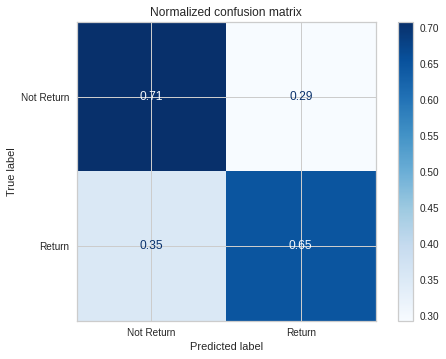

Area under curve :  0.6784849907885706 ( Linear SVM )



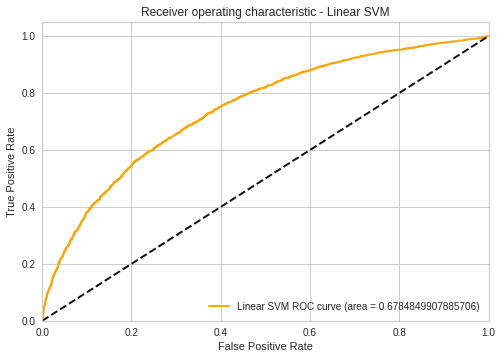

In [ ]:
from sklearn.svm import SVC

svc_lin  = SVC(C=1.0, cache_size=1000, class_weight=None, coef0=0.0,
               decision_function_shape='ovr', degree=3, gamma=1.0, kernel='linear',
               max_iter=-1, probability=True, random_state=None, shrinking=True,
               tol=0.001, verbose=False)


coef_sumry,fpr,tpr,thresholds,conf_matrix = retention_prediction('Linear SVM', svc_lin,os_smote_X,test_X,os_smote_Y,test_Y,
                         predictors,"coefficients",threshold_plot = False)